#QUESTION 1a

This line imports the drive module from Google Colab, allowing access to Google Drive files within the Colab environment.

In [253]:
from google.colab import drive

This line mounts your Google Drive to the Colab environment, making files in your Drive accessible at the path /content/Drive.

In [254]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


This line imports the pandas library

In [255]:
import pandas as pd

This line defines the file path to an Excel file named "Draft 3.xlsx", stored in Google Drive via Google Colab.

In [256]:
path=('/content/Drive/MyDrive/Colab Notebooks/Draft 3.xlsx')

This line reads the 'Data' sheet from the Excel file at the specified path into a pandas DataFrame named WDIs.


In [257]:
WDIs=pd.read_excel(path,'Data')

This line displays the contents of the WDIs DataFrame, showing the imported data from the Excel sheet.




In [258]:
WDIs

,Country,Series,2019,2020,2021,2022,2023
0,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",0.124496,0.064994,0.144467,NaN,NaN
1,Afghanistan,"GDP per capita, PPP (constant 2021 internation...",2927.245144,2769.685745,2144.166570,1981.710168,1992.424394
2,Afghanistan,Individuals using the Internet (% of population),17.600000,17.000000,16.500000,17.200000,17.700000
3,Afghanistan,Access to electricity (% of population),97.700000,97.700000,97.700000,85.300000,NaN
4,Afghanistan,"Government expenditure on education, total (% ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1325,World,"Foreign direct investment, net inflows (% of GDP)",2.174049,1.361253,2.412282,1.770429,0.739993
1326,World,"GDP per capita, PPP (constant 2021 internation...",19335.552303,18600.986362,19637.823230,20130.428319,20604.121950
1327,World,Individuals using the Internet (% of population),52.900000,58.600000,61.700000,63.700000,65.400000
1328,World,Access to electricity (% of population),90.106930,90.397378,91.334992,91.277853,NaN


#QUESTION 1b

This line prints the names of all the columns in the WDIs DataFrame.










In [259]:
print(WDIs.columns)

Index(['Country ', 'Series ', 2019, 2020, 2021, 2022, 2023], dtype='object')


This line reshapes the WDIs DataFrame from wide to long format. It keeps the columns "Country " and "Series " as identifiers, and transforms the remaining columns into two new columns: "Year" (containing the original column names) and "Var" (containing the corresponding values).

In [260]:
WDIs_long=pd.melt(WDIs,id_vars=["Country ","Series "],var_name="Year",value_name="Var")

This line displays the reshaped WDIs_long DataFrame, showing the data in long format with the columns Country, Series, Year, and Var.

In [261]:
WDIs_long

,Country,Series,Year,Var
0,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",2019,0.124496
1,Afghanistan,"GDP per capita, PPP (constant 2021 internation...",2019,2927.245144
2,Afghanistan,Individuals using the Internet (% of population),2019,17.600000
3,Afghanistan,Access to electricity (% of population),2019,97.700000
4,Afghanistan,"Government expenditure on education, total (% ...",2019,NaN
...,...,...,...,...
6645,World,"Foreign direct investment, net inflows (% of GDP)",2023,0.739993
6646,World,"GDP per capita, PPP (constant 2021 internation...",2023,20604.121950
6647,World,Individuals using the Internet (% of population),2023,65.400000
6648,World,Access to electricity (% of population),2023,NaN


This line transforms the WDIs_long DataFrame back into a wide format. It sets 'Country ' and 'Year' as the index, 'Series ' as the columns, and fills the data in the cells with values from 'Var'.

In [262]:
WDIs_wide=WDIs_long.pivot(index=['Country ','Year'],columns='Series ',values='Var')

This line displays the reshaped WDIs_wide DataFrame, showing the data in wide format with Country and Year as the index, Series as columns, and the corresponding values in the cells.










In [263]:
WDIs_wide

Series            Access to electricity (% of population)  \
Country     Year                                            
Afghanistan 2019                                     97.7   
            2020                                     97.7   
            2021                                     97.7   
            2022                                     85.3   
            2023                                      NaN   
...                                                   ...   
Zimbabwe    2019                                     46.7   
            2020                                     52.7   
            2021                                     49.0   
            2022                                     50.1   
            2023                                      NaN   

Series            Foreign direct investment, net inflows (% of GDP)  \
Country     Year                                                      
Afghanistan 2019                                           0.124496   
            2020                                           0.064994   
            2021                                           0.144467   
            2022                                                NaN   
            2023                                                NaN   
...                                                             ...   
Zimbabwe    2019                                           0.970160   
            2020                                           0.559626   
            2021                                           0.871791   
            2022                                           1.027031   
            2023                                           1.583455   

Series            GDP per capita, PPP (constant 2021 international $)  \
Country     Year                                                        
Afghanistan 2019                                        2927.245144     
            2020                                        2769.685745     
            2021                                        2144.166570     
            2022                                        1981.710168     
            2023                                        1992.424394     
...                                                             ...     
Zimbabwe    2019                                        3294.806084     
            2020                                        2987.269823     
            2021                                        3184.785451     
            2022                                        3323.121932     
            2023                                        3442.251327     

Series            Government expenditure on education, total (% of GDP)  \
Country     Year                                                          
Afghanistan 2019                                                NaN       
            2020                                                NaN       
            2021                                                NaN       
            2022                                                NaN       
            2023                                                NaN       
...                                                             ...       
Zimbabwe    2019                                                NaN       
            2020                                                NaN       
            2021                                                NaN       
            2022                                                NaN       
            2023                                                NaN       

Series            Individuals using the Internet (% of population)  
Country     Year                                                    
Afghanistan 2019                                              17.6  
            2020                                              17.0  
            2021                                              16.5  
           

This code imports the numpy library and assigns nan to NA for convenience. The line WDIs_wide_dropna = WDIs_wide.dropna() removes any rows from the WDIs_wide DataFrame that contain missing (NaN) values, creating a new DataFrame WDIs_wide_dropna.

In [264]:
import numpy as np
from numpy import nan as NA

WDIs_wide_dropna=WDIs_wide.dropna()

This line displays the WDIs_wide_dropna DataFrame, which is the version of WDIs_wide with any rows containing missing (NaN) values removed.

In [265]:
WDIs_wide_dropna

Series         Access to electricity (% of population)  \
Country  Year                                            
Albania  2019                               100.000000   
         2020                               100.000000   
         2021                               100.000000   
         2022                               100.000000   
Algeria  2019                                99.500000   
...                                                ...   
World    2022                                91.277853   
Zambia   2019                                43.000000   
         2020                                44.600000   
         2021                                46.700000   
         2022                                47.800000   

Series         Foreign direct investment, net inflows (% of GDP)  \
Country  Year                                                      
Albania  2019                                           7.706218   
         2020                                           7.018652   
         2021                                           6.757907   
         2022                                           7.579342   
Algeria  2019                                           0.713947   
...                                                          ...   
World    2022                                           1.770429   
Zambia   2019                                           2.350919   
         2020                                           1.351906   
         2021                                           1.784078   
         2022                                          -0.223287   

Series         GDP per capita, PPP (constant 2021 international $)  \
Country  Year                                                        
Albania  2019                                       15065.749573     
         2020                                       14650.395929     
         2021                                       16113.136519     
         2022                                       17097.478360     
Algeria  2019                                       15199.198997     
...                                                          ...     
World    2022                                       20130.428319     
Zambia   2019                                        3591.564189     
         2020                                        3391.595412     
         2021                                        3503.034914     
         2022                                        3585.123791     

Series         Government expenditure on education, total (% of GDP)  \
Country  Year                                                          
Albania  2019                                           3.916240       
         2020                                           3.342300       
         2021                                           3.022560       
         2022                                           2.744330       
Algeria  2019                                           5.575366       
...                                                          ...       
World    2022                                           3.774872       
Zambia   2019                                           4.418240       
         2020                                           3.949648       
         2021                                           3.106432       
         2022                                           3.582595       

Series         Individuals using the Internet (% of population)  
Country  Year                                                    
Albania  2019                                              68.6  
         2020                                              72.2  
         2021                                              79.3  
         2022                                              82.6  
Algeria  2019                                              55.8  
...                                               

This line creates a new DataFrame df1 by selecting specific columns from WDIs_wide_dropna (including 'Access to electricity', 'Foreign direct investment', 'GDP per capita', 'Government expenditure on education', and 'Individuals using the Internet'). It then resets the index of the DataFrame.

In [266]:
df1=WDIs_wide_dropna[['Access to electricity (% of population)','Foreign direct investment, net inflows (% of GDP)','GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)','Individuals using the Internet (% of population)']].reset_index()

This line displays the df1 DataFrame, which contains the selected columns from WDIs_wide_dropna, with the index reset to a default integer index.

In [267]:
df1

Series,Country,Year,Access to electricity (% of population),"Foreign direct investment, net inflows (% of GDP)","GDP per capita, PPP (constant 2021 international $)","Government expenditure on education, total (% of GDP)",Individuals using the Internet (% of population)
0,Albania,2019,100.000000,7.706218,15065.749573,3.916240,68.6
1,Albania,2020,100.000000,7.018652,14650.395929,3.342300,72.2
2,Albania,2021,100.000000,6.757907,16113.136519,3.022560,79.3
3,Albania,2022,100.000000,7.579342,17097.478360,2.744330,82.6
4,Algeria,2019,99.500000,0.713947,15199.198997,5.575366,55.8
...,...,...,...,...,...,...,...
587,World,2022,91.277853,1.770429,20130.428319,3.774872,63.7
588,Zambia,2019,43.000000,2.350919,3591.564189,4.418240,18.7
589,Zambia,2020,44.600000,1.351906,3391.595412,3.949648,24.5
590,Zambia,2021,46.700000,1.784078,3503.034914,3.106432,32.5


This line assigns the df1 DataFrame to a new variable called data1, effectively creating a copy of df1.










In [268]:
data1=df1

#QUESTION 1c

This line defines the file path to an Excel file named "AMENDED IFS DATASET.xlsx", stored in Google Drive via Google Colab.

In [269]:
Path2=('/content/Drive/MyDrive/Colab Notebooks/AMENDED IFS DATASET.xlsx')

This line reads the 'data1' sheet from the Excel file located at Path2 into a pandas DataFrame named IFS.










In [270]:
IFS=pd.read_excel(Path2,'data1')

This line displays the contents of the IFS DataFrame, which contains the data imported from the 'data1' sheet of the AMENDED IFS DATASET.xlsx file.










In [271]:
IFS

,Country,Series,2019,2020,2021,2022,2023
0,Albania,"Expenditure, General government, Domestic curr...",491.928,536.280,596.279,651.015,674.677
1,Algeria,"Current account balance (credit less debit), P...",-8.746,-11.338,-2.427,8.449,2.490
2,Albania,Unemployment rate,11.470,11.675,11.500,10.900,10.700
3,Albania,"Current account balance (credit less debit), P...",-7.571,-8.659,-7.676,-5.874,-1.247
4,Albania,"Gross domestic product (GDP), Current prices, ...",15.399,15.192,17.984,19.083,22.822
...,...,...,...,...,...,...,...
658,Uruguay,"Revenue, General government, Percent of GDP",27.861,28.068,27.553,27.641,27.686
659,"Venezuela, República Bolivariana de","Revenue, General government, Percent of GDP",10.090,4.526,7.249,8.274,10.824
660,"Uzbekistan, Republic of","Revenue, General government, Percent of GDP",24.033,23.077,23.337,27.696,26.181
661,West Bank and Gaza,"Revenue, General government, Percent of GDP",23.855,25.661,25.623,28.133,29.842


This line reshapes the IFS DataFrame from wide to long format. It keeps "Country" and "Series" as identifier columns, and converts the remaining columns into two new columns: "Year" (which holds the original column names) and "Var" (which contains the corresponding values).










In [272]:
IFS_long=pd.melt(IFS,id_vars=["Country","Series"],var_name="Year",value_name="Var")

This line displays the reshaped IFS_long DataFrame, which is now in long format with the columns Country, Series, Year, and Var.










In [273]:
IFS_long

,Country,Series,Year,Var
0,Albania,"Expenditure, General government, Domestic curr...",2019,491.928
1,Algeria,"Current account balance (credit less debit), P...",2019,-8.746
2,Albania,Unemployment rate,2019,11.470
3,Albania,"Current account balance (credit less debit), P...",2019,-7.571
4,Albania,"Gross domestic product (GDP), Current prices, ...",2019,15.399
...,...,...,...,...
3310,Uruguay,"Revenue, General government, Percent of GDP",2023,27.686
3311,"Venezuela, República Bolivariana de","Revenue, General government, Percent of GDP",2023,10.824
3312,"Uzbekistan, Republic of","Revenue, General government, Percent of GDP",2023,26.181
3313,West Bank and Gaza,"Revenue, General government, Percent of GDP",2023,29.842


This line reshapes the IFS_long DataFrame back into a wide format using a pivot_table. It sets 'Country' and 'Year' as the index, 'Series' as the columns, and fills the data with values from 'Var'. The aggfunc='first' argument ensures that if there are multiple values for the same combination of Country and Year, the first value is selected.

In [274]:
IFS_wide=IFS_long.pivot(index=['Country','Year'],columns='Series',values='Var')

This line displays the reshaped IFS_wide DataFrame, which is in wide format with Country and Year as the index, Series as the columns, and the corresponding values from Var in the cells.










In [275]:
IFS_wide

Series                   Current account balance (credit less debit), Percent of GDP  \
Country            Year                                                                
Albania            2019                                             -7.571             
                   2020                                             -8.659             
                   2021                                             -7.676             
                   2022                                             -5.874             
                   2023                                             -1.247             
...                                                                    ...             
West Bank and Gaza 2019                                            -10.385             
                   2020                                            -12.250             
                   2021                                             -9.818             
                   2022                                            -10.626             
                   2023                                            -16.620             

Series                   Expenditure, General government, Domestic currency  \
Country            Year                                                       
Albania            2019                                            491.928    
                   2020                                            536.280    
                   2021                                            596.279    
                   2022                                            651.015    
                   2023                                            674.677    
...                                                                    ...    
West Bank and Gaza 2019                                             17.304    
                   2020                                             17.662    
                   2021                                             18.034    
                   2022                                             18.708    
                   2023                                             19.689    

Series                   Gross capital formation, Percent of GDP  \
Country            Year                                            
Albania            2019                                   23.032   
                   2020                                   22.677   
                   2021                                   25.469   
                   2022                                   24.874   
                   2023                                   19.444   
...                                                          ...   
West Bank and Gaza 2019                                   26.801   
                   2020                                   24.304   
                   2021                                   25.451   
                   2022                                   26.523   
                   2023                                   26.205   

Series                   Gross domestic product (GDP), Current prices, US dollar  \
Country            Year                                                            
Albania            2019                                             15.399         
                   2020                                             15.192         
                   2021                                             17.984         
                   2022                                             19.083         
                   2023                                             22.822         
...                                                                    ...         
West Bank and Gaza 2019                                             17.134         
                   2020                                             15.532         
                   2021                                             18.109         
                  

This code imports numpy and assigns nan to NA for convenience. The line IFS_wide_dropna = IFS_wide.dropna() removes any rows from the IFS_wide DataFrame that contain missing (NaN) values, creating a new DataFrame IFS_wide_dropna.










In [276]:
import numpy as np
from numpy import nan as NA

IFS_wide_dropna=IFS_wide.dropna()

This line displays the IFS_wide_dropna DataFrame, which is the version of IFS_wide with any rows containing missing (NaN) values removed.










In [277]:
IFS_wide_dropna

Series                   Current account balance (credit less debit), Percent of GDP  \
Country            Year                                                                
Albania            2019                                             -7.571             
                   2020                                             -8.659             
                   2021                                             -7.676             
                   2022                                             -5.874             
                   2023                                             -1.247             
...                                                                    ...             
Vietnam            2023                                              5.785             
West Bank and Gaza 2019                                            -10.385             
                   2020                                            -12.250             
                   2021                                             -9.818             
                   2022                                            -10.626             

Series                   Expenditure, General government, Domestic currency  \
Country            Year                                                       
Albania            2019                                            491.928    
                   2020                                            536.280    
                   2021                                            596.279    
                   2022                                            651.015    
                   2023                                            674.677    
...                                                                    ...    
Vietnam            2023                                        1995298.000    
West Bank and Gaza 2019                                             17.304    
                   2020                                             17.662    
                   2021                                             18.034    
                   2022                                             18.708    

Series                   Gross capital formation, Percent of GDP  \
Country            Year                                            
Albania            2019                                   23.032   
                   2020                                   22.677   
                   2021                                   25.469   
                   2022                                   24.874   
                   2023                                   19.444   
...                                                          ...   
Vietnam            2023                                   31.962   
West Bank and Gaza 2019                                   26.801   
                   2020                                   24.304   
                   2021                                   25.451   
                   2022                                   26.523   

Series                   Gross domestic product (GDP), Current prices, US dollar  \
Country            Year                                                            
Albania            2019                                             15.399         
                   2020                                             15.192         
                   2021                                             17.984         
                   2022                                             19.083         
                   2023                                             22.822         
...                                                                    ...         
Vietnam            2023                                            433.702         
West Bank and Gaza 2019                                             17.134         
                   2020                                             15.532         
                  

This line creates a new DataFrame df2 by selecting specific columns from IFS_wide_dropna (including 'Current account balance', 'Expenditure, General government', 'Gross capital formation', 'GDP (current prices)', 'Revenue, General government', and 'Unemployment rate'). It then resets the index of the DataFrame.










In [278]:
df2=IFS_wide_dropna[['Current account balance (credit less debit), Percent of GDP','Expenditure, General government, Domestic currency','Gross capital formation, Percent of GDP','Gross domestic product (GDP), Current prices, US dollar','Revenue, General government, Percent of GDP','Unemployment rate']].reset_index()

This line displays the df2 DataFrame, which contains the selected columns from IFS_wide_dropna, with the index reset to a default integer index.










In [279]:
df2

Series,Country,Year,"Current account balance (credit less debit), Percent of GDP","Expenditure, General government, Domestic currency","Gross capital formation, Percent of GDP","Gross domestic product (GDP), Current prices, US dollar","Revenue, General government, Percent of GDP",Unemployment rate
0,Albania,2019,-7.571,491.928,23.032,15.399,27.209,11.470
1,Albania,2020,-8.659,536.280,22.677,15.192,25.853,11.675
2,Albania,2021,-7.676,596.279,25.469,17.984,27.527,11.500
3,Albania,2022,-5.874,651.015,24.874,19.083,26.787,10.900
4,Albania,2023,-1.247,674.677,19.444,22.822,27.822,10.700
...,...,...,...,...,...,...,...,...
509,Vietnam,2023,5.785,1995298.000,31.962,433.702,17.057,2.010
510,West Bank and Gaza,2019,-10.385,17.304,26.801,17.134,23.855,25.350
511,West Bank and Gaza,2020,-12.250,17.662,24.304,15.532,25.661,25.925
512,West Bank and Gaza,2021,-9.818,18.034,25.451,18.109,25.623,26.392


This line assigns the df2 DataFrame to a new variable called data2, creating a copy of df2.










In [280]:
data2=df2

#QUESTION 1d

This line defines the file path to a .parquet file named "bing_covid-19_data (1).parquet", stored in Google Drive via Google Colab.

In [281]:
path3=('/content/Drive/MyDrive/Colab Notebooks/bing_covid-19_data (1).parquet')

This line reads the .parquet file located at path3 into a pandas DataFrame named Covid.










In [282]:
Covid=pd.read_parquet(path3)

This line displays the contents of the Covid DataFrame, which contains the data imported from the bing_covid-19_data (1).parquet file.










In [283]:
Covid

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2,load_time
0,338995,2020-01-21,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,None,Worldwide,None,None,None,2025-04-08 00:04:27.898633
1,338996,2020-01-22,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,None,None,Worldwide,None,None,None,2025-04-08 00:04:27.898633
2,338997,2020-01-23,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,None,None,Worldwide,None,None,None,2025-04-08 00:04:27.898633
3,338998,2020-01-24,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,None,None,Worldwide,None,None,None,2025-04-08 00:04:27.898633
4,338999,2020-01-25,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,None,None,Worldwide,None,None,None,2025-04-08 00:04:27.898633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766731,229419768,2023-03-01,865,0.0,0.0,0.0,NaN,NaN,-18.99976,29.29671,ZW,ZWE,Zimbabwe,MI,None,Kwekwe,2025-04-08 00:04:27.898633
4766732,229477103,2023-03-02,865,0.0,0.0,0.0,NaN,NaN,-18.99976,29.29671,ZW,ZWE,Zimbabwe,MI,None,Kwekwe,2025-04-08 00:04:27.898633
4766733,229532829,2023-03-03,865,0.0,0.0,0.0,NaN,NaN,-18.99976,29.29671,ZW,ZWE,Zimbabwe,MI,None,Kwekwe,2025-04-08 00:04:27.898633
4766734,229584948,2023-03-04,865,0.0,0.0,0.0,NaN,NaN,-18.99976,29.29671,ZW,ZWE,Zimbabwe,MI,None,Kwekwe,2025-04-08 00:04:27.898633


This line resets the index of the Covid DataFrame, creating a new DataFrame df3 with the index set to the default integer index.

In [284]:
df3=Covid.reset_index()

These two lines perform the following actions:

df3['updated'] = pd.to_datetime(df3['updated']): Converts the 'updated' column in df3 to datetime format.

df3['Year'] = df3['updated'].dt.year: Extracts the year from the 'updated' datetime column and creates a new column 'Year' in df3.

In [285]:
df3['updated'] = pd.to_datetime(df3['updated'])
df3['Year'] = df3['updated'].dt.year

This line groups the df3 DataFrame by 'country_region' and 'Year' and calculates the following aggregates:

Total_Confirmed: The sum of the 'confirmed' cases for each group.

Total_Deaths: The sum of the 'deaths' for each group.

Total_Recovered: The sum of the 'recovered' cases for each group.

Daily_Records: The count of daily records (number of rows) for each group.

The result is stored in a new DataFrame yearly_totals, and the index is reset.

In [286]:
yearly_totals = df3.groupby(['country_region', 'Year']).agg(
Total_Confirmed=('confirmed', 'sum'),
Total_Deaths=('deaths', 'sum'),
Total_Recovered=('recovered', 'sum'),
Daily_Records=('confirmed', 'count')
).reset_index()

This line displays the contents of the yearly_totals DataFrame, which contains the aggregated totals for confirmed cases, deaths, recovered cases, and the count of daily records, grouped by country_region and Year.

In [287]:
print(yearly_totals)

    country_region  Year  Total_Confirmed  Total_Deaths  Total_Recovered  \
0      Afghanistan  2020          8573552      296583.0        5979181.0   
1      Afghanistan  2021         39174634     1759148.0       18657813.0   
2      Afghanistan  2022         67753508     2809380.0              0.0   
3      Afghanistan  2023         13138535      496297.0              0.0   
4          Albania  2020          3783306       88354.0        1994594.0   
..             ...   ...              ...           ...              ...   
925         Zambia  2023         21424525      254736.0              0.0   
926       Zimbabwe  2020          1348382       36228.0        1024985.0   
927       Zimbabwe  2021         30274502     1023046.0       14018302.0   
928       Zimbabwe  2022         91531152     2009729.0              0.0   
929       Zimbabwe  2023         16588290      356024.0              0.0   

     Daily_Records  
0              312  
1              359  
2              365  
3  

The yearly_totals DataFrame contains aggregated data for each country_region and Year, with columns for:

Total_Confirmed: Total confirmed cases for the year.

Total_Deaths: Total deaths for the year.

Total_Recovered: Total recovered cases for the year.

Daily_Records: Count of daily records (entries) for each country and year.

In [288]:
yearly_totals

,country_region,Year,Total_Confirmed,Total_Deaths,Total_Recovered,Daily_Records
0,Afghanistan,2020,8573552,296583.0,5979181.0,312
1,Afghanistan,2021,39174634,1759148.0,18657813.0,359
2,Afghanistan,2022,67753508,2809380.0,0.0,365
3,Afghanistan,2023,13138535,496297.0,0.0,63
4,Albania,2020,3783306,88354.0,1994594.0,299
...,...,...,...,...,...,...
925,Zambia,2023,21424525,254736.0,0.0,63
926,Zimbabwe,2020,1348382,36228.0,1024985.0,286
927,Zimbabwe,2021,30274502,1023046.0,14018302.0,551
928,Zimbabwe,2022,91531152,2009729.0,0.0,730


This line renames the 'country_region' column in the yearly_totals DataFrame to 'Country', and stores the updated DataFrame in data3.

In [289]:
data3 = yearly_totals.rename(columns={'country_region': 'Country'})

The data3 DataFrame is a modified version of yearly_totals, where the column 'country_region' has been renamed to 'Country'. It contains the aggregated data for each Country and Year

In [290]:
data3

,Country,Year,Total_Confirmed,Total_Deaths,Total_Recovered,Daily_Records
0,Afghanistan,2020,8573552,296583.0,5979181.0,312
1,Afghanistan,2021,39174634,1759148.0,18657813.0,359
2,Afghanistan,2022,67753508,2809380.0,0.0,365
3,Afghanistan,2023,13138535,496297.0,0.0,63
4,Albania,2020,3783306,88354.0,1994594.0,299
...,...,...,...,...,...,...
925,Zambia,2023,21424525,254736.0,0.0,63
926,Zimbabwe,2020,1348382,36228.0,1024985.0,286
927,Zimbabwe,2021,30274502,1023046.0,14018302.0,551
928,Zimbabwe,2022,91531152,2009729.0,0.0,730


This line merges the data1 and data2 DataFrames based on the common columns 'Country ' and 'Year'. The merge uses an inner join, meaning only the rows with matching Country and Year values in both DataFrames will be kept. The result is stored in data4.

In [291]:
data4=pd.merge(data1, data2, left_on=['Country ','Year'], right_on=['Country', 'Year'], how='inner')

The data4 DataFrame is the result of merging data1 and data2 on the 'Country ' and 'Year' columns using an inner join. It contains the combined data from both DataFrames, with only the rows that have matching values for Country and Year in both.

In [292]:
data4

,Country,Year,Access to electricity (% of population),"Foreign direct investment, net inflows (% of GDP)","GDP per capita, PPP (constant 2021 international $)","Government expenditure on education, total (% of GDP)",Individuals using the Internet (% of population),Country,"Current account balance (credit less debit), Percent of GDP","Expenditure, General government, Domestic currency","Gross capital formation, Percent of GDP","Gross domestic product (GDP), Current prices, US dollar","Revenue, General government, Percent of GDP",Unemployment rate
0,Albania,2019,100.0,7.706218,15065.749573,3.916240,68.6,Albania,-7.571,491.928,23.032,15.399,27.209,11.470
1,Albania,2020,100.0,7.018652,14650.395929,3.342300,72.2,Albania,-8.659,536.280,22.677,15.192,25.853,11.675
2,Albania,2021,100.0,6.757907,16113.136519,3.022560,79.3,Albania,-7.676,596.279,25.469,17.984,27.527,11.500
3,Albania,2022,100.0,7.579342,17097.478360,2.744330,82.6,Albania,-5.874,651.015,24.874,19.083,26.787,10.900
4,Algeria,2019,99.5,0.713947,15199.198997,5.575366,55.8,Algeria,-8.746,8566.208,47.041,193.361,28.591,11.383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Uruguay,2019,99.9,2.357033,30108.075051,4.628340,83.4,Uruguay,1.232,670.720,14.121,62.230,27.861,8.925
258,Uruguay,2020,100.0,1.813807,27871.600479,4.542920,85.5,Uruguay,-0.733,737.922,16.433,53.666,28.068,10.350
259,Uruguay,2021,100.0,8.501003,29441.477487,4.460660,87.6,Uruguay,-2.469,798.801,18.277,60.762,27.553,9.375
260,Uruguay,2022,100.0,12.367234,30879.928818,4.507330,89.9,Uruguay,-3.919,871.994,18.917,70.165,27.641,7.867


#QUESTION 1e

This line merges the data4 and data3 DataFrames based on the 'Country ' and 'Year' columns. The merge uses an inner join, so only rows with matching Country and Year values in both DataFrames are kept. The result is stored in data5.

In [293]:
data5=pd.merge(data4, data3, left_on=['Country ','Year'], right_on=['Country', 'Year'], how='inner')

The data5 DataFrame is the result of merging data4 and data3 on the 'Country ' and 'Year' columns using an inner join. It combines data from both DataFrames, keeping only the rows where the Country and Year values match in both.

In [294]:
data5

,Country,Year,Access to electricity (% of population),"Foreign direct investment, net inflows (% of GDP)","GDP per capita, PPP (constant 2021 international $)","Government expenditure on education, total (% of GDP)",Individuals using the Internet (% of population),Country_x,"Current account balance (credit less debit), Percent of GDP","Expenditure, General government, Domestic currency","Gross capital formation, Percent of GDP","Gross domestic product (GDP), Current prices, US dollar","Revenue, General government, Percent of GDP",Unemployment rate,Country_y,Total_Confirmed,Total_Deaths,Total_Recovered,Daily_Records
0,Albania,2020,100.0,7.018652,14650.395929,3.34230,72.2,Albania,-8.659,536.280,22.677,15.192,25.853,11.675,Albania,3783306,88354.0,1.994594e+06,299
1,Albania,2021,100.0,6.757907,16113.136519,3.02256,79.3,Albania,-7.676,596.279,25.469,17.984,27.527,11.500,Albania,50724067,861917.0,2.830888e+07,361
2,Albania,2022,100.0,7.579342,17097.478360,2.74433,82.6,Albania,-5.874,651.015,24.874,19.083,26.787,10.900,Albania,107915918,1280691.0,0.000000e+00,365
3,Argentina,2020,100.0,1.266169,23877.093140,5.27690,85.5,Argentina,0.698,11558.522,16.598,385.218,33.805,11.550,Argentina,353720031,8897948.0,2.391153e+08,6656
4,Argentina,2021,100.0,1.368381,26300.274261,4.64117,87.2,Argentina,1.363,17509.344,17.875,486.040,33.550,8.750,Argentina,2982439831,63827667.0,2.085006e+09,8599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,United States,2020,100.0,0.641872,67352.387139,5.39998,90.3,United States,-2.815,9517.118,21.419,21354.125,30.646,8.092,United States,5078674897,130387800.0,1.134320e+09,839964
176,United States,2021,100.0,2.009212,71318.307359,5.42830,91.3,United States,-3.665,10088.028,21.333,23681.175,31.576,5.350,United States,38155567794,646342290.0,1.262761e+09,1098253
177,Uruguay,2020,100.0,1.813807,27871.600479,4.54292,85.5,Uruguay,-0.733,737.922,16.433,53.666,28.068,10.350,Uruguay,781299,12239.0,5.561680e+05,294
178,Uruguay,2021,100.0,8.501003,29441.477487,4.46066,87.6,Uruguay,-2.469,798.801,18.277,60.762,27.553,9.375,Uruguay,98915376,1467066.0,5.754624e+07,361


#Question 2a

#Current account balance (credit less debit), Percent of GDP x Access to electricity

This code performs the following steps:

df = pd.DataFrame(data5): Converts data5 into a pandas DataFrame.

y = df['Current account balance (credit less debit), Percent of GDP']: Sets the dependent variable y as the 'Current account balance (credit less debit), Percent of GDP' column from the DataFrame.

x_variables = [...]: Defines a list of independent variables (x) to plot against y.

Inside the loop, it selects x = df['Access to electricity (% of population)'], which is the same in every iteration instead of iterating over each x_col from the x_variables list. This seems to be an error, as it should dynamically select from the list.

np.polyfit(x, y, 1): Fits a linear regression model to the data, using x and y. The 1 means linear regression.

polynomial = np.poly1d(coefficients): Creates a polynomial function based on the coefficients of the linear fit.

y_fitted = polynomial(x): Uses the polynomial to calculate the fitted y values based on x.

The remianing plot graphs will all have the same explanations.

Results:

The red regression line is nearly horizontal, suggesting little to no linear correlation.

In [295]:
df = pd.DataFrame(data5)

# Dependent variable (Y)
y = df['Current account balance (credit less debit), Percent of GDP']

# List of X variables to plot against Y
x_variables = ['Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)','Individuals using the Internet (% of population)']

for x_col in x_variables:
    x = df['Access to electricity (% of population)']

    # Fit linear regression
    coefficients = np.polyfit(x, y, 1)  # 1 = linear regression
    polynomial = np.poly1d(coefficients)
    y_fitted = polynomial(x)

This code creates a plot to visualize the relationship between the independent variable x and the dependent variable y

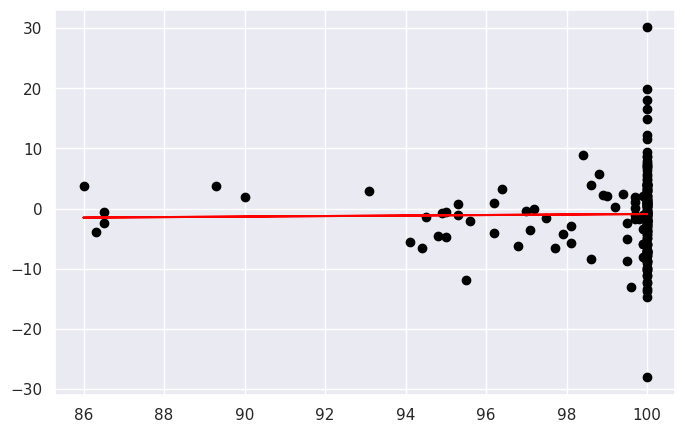

In [296]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', color='black', label='Actual Data')
plt.plot(x, y_fitted, '-', color='red', label='Fitted Line')

#Current account balance (credit less debit), Percent of GDP x Foreign direct investment, net inflows (% of GDP)

Results:

The red regession line has an upward slope which indicated a positive linear regression.

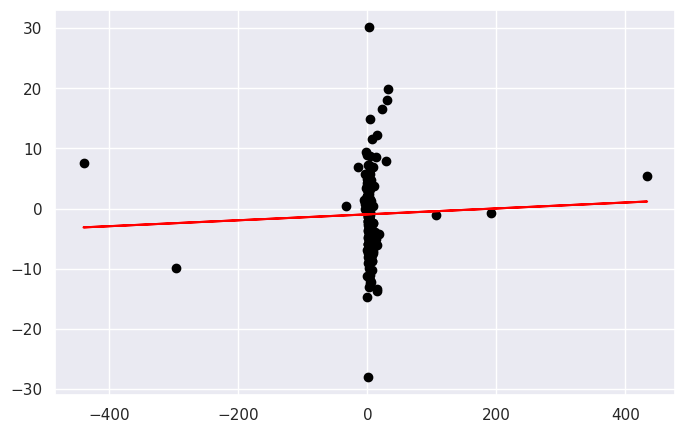

In [297]:
df = pd.DataFrame(data5)

# Dependent variable (Y)
y = df['Current account balance (credit less debit), Percent of GDP']

# List of X variables to plot against Y
x_variables = ['Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)','Individuals using the Internet (% of population)']

for x_col in x_variables:
    x = df['Foreign direct investment, net inflows (% of GDP)']

    # Fit linear regression
    coefficients = np.polyfit(x, y, 1)  # 1 = linear regression
    polynomial = np.poly1d(coefficients)
    y_fitted = polynomial(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', color='black', label='Actual Data')
plt.plot(x, y_fitted, '-', color='red', label='Fitted Line')


#Current account balance (credit less debit), Percent of GDP x GDP per capita, PPP (constant 2021 international $)

Results:

The red regression line shows a slight positive trend indicating a positive correlation.

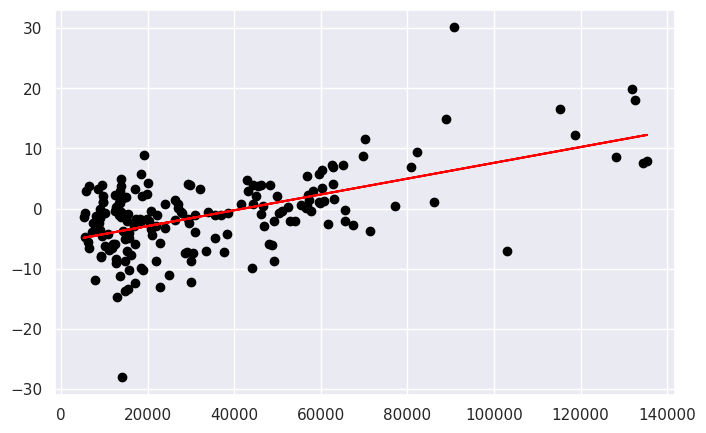

In [298]:
df = pd.DataFrame(data5)

# Dependent variable (Y)
y = df['Current account balance (credit less debit), Percent of GDP']

# List of X variables to plot against Y
x_variables = ['Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)','Individuals using the Internet (% of population)']

for x_col in x_variables:
    x = df['GDP per capita, PPP (constant 2021 international $)']

    # Fit linear regression
    coefficients = np.polyfit(x, y, 1)  # 1 = linear regression
    polynomial = np.poly1d(coefficients)
    y_fitted = polynomial(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', color='black', label='Actual Data')
plt.plot(x, y_fitted, '-', color='red', label='Fitted Line')


# Current account balance (credit less debit), Percent of GDP x Government expenditure on education, total (% of GDP)

Results:

The red regression line is almost flat, indicating no significant linear relationship.

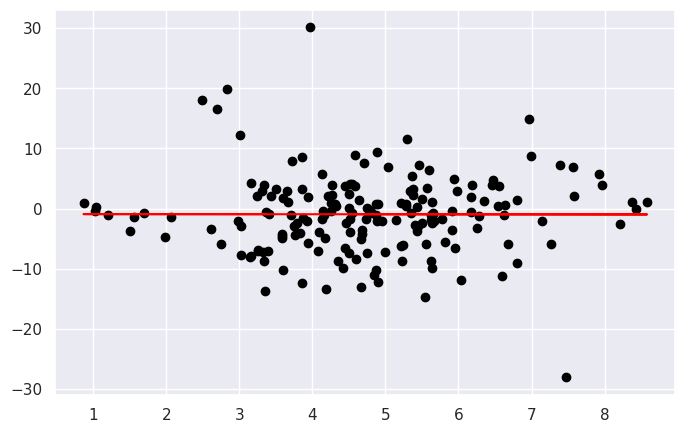

In [299]:
df = pd.DataFrame(data5)

# Dependent variable (Y)
y = df['Current account balance (credit less debit), Percent of GDP']

# List of X variables to plot against Y
x_variables = ['Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)','Individuals using the Internet (% of population)']

for x_col in x_variables:
    x = df['Government expenditure on education, total (% of GDP)']

    # Fit linear regression
    coefficients = np.polyfit(x, y, 1)  # 1 = linear regression
    polynomial = np.poly1d(coefficients)
    y_fitted = polynomial(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', color='black', label='Actual Data')
plt.plot(x, y_fitted, '-', color='red', label='Fitted Line')


#Current account balance (credit less debit), Percent of GDP x Individuals using the Internet (% of population)

Results:

The red regression line shows a positive upward slope, indicating a positive correlation.

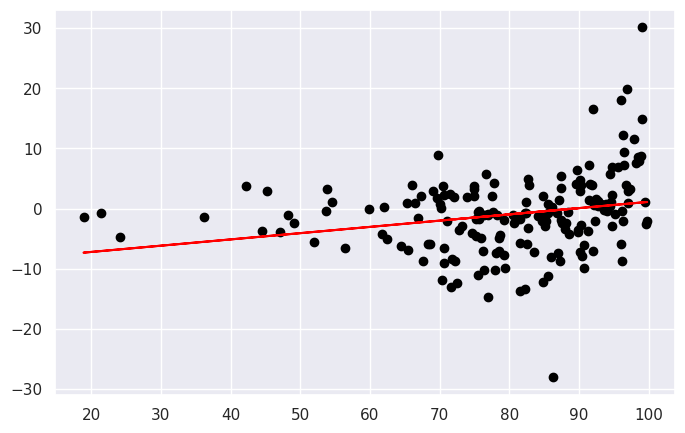

In [300]:
df = pd.DataFrame(data5)

# Dependent variable (Y)
y = df['Current account balance (credit less debit), Percent of GDP']

# List of X variables to plot against Y
x_variables = ['Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)','Individuals using the Internet (% of population)']

for x_col in x_variables:
    x = df['Individuals using the Internet (% of population)']

    # Fit linear regression
    coefficients = np.polyfit(x, y, 1)  # 1 = linear regression
    polynomial = np.poly1d(coefficients)
    y_fitted = polynomial(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', color='black', label='Actual Data')
plt.plot(x, y_fitted, '-', color='red', label='Fitted Line')

#QUESTION 2b

This code imports the following libraries:

pandas (pd): Used for data manipulation and analysis, particularly for handling data in tabular form (like DataFrames).

statsmodels.api (sm): A library for statistical modeling, including linear regression, time series analysis, and hypothesis testing.

tabulate: A library used to format and display tables in a clean, readable way (often in text format for better presentation).

In [301]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

This code performs multiple regression analyses and displays the results in a well-organized table. Here's a step-by-step explanation:

models = []: Initializes an empty list to store regression models.

Bivariate Regressions:

Model 1: Performs a simple linear regression of y (current account balance) on 'Access to electricity (% of population)'. The constant (intercept) is added using sm.add_constant().

Model 2: Performs a simple linear regression of y on 'Foreign direct investment, net inflows (% of GDP)' with a constant.

Multivariate Regression:

Model 3: A multiple linear regression of y on several independent variables, including 'Access to electricity', 'Foreign direct investment', 'GDP per capita', 'Government expenditure on education', and 'Individuals using the Internet'.

Create Regression Table:

results_table: A list to store the regression results.

variables: A list of variable names (including the constant) for which coefficients are extracted.

For each variable, the code collects the coefficient and p-value from each model and adds significance stars (e.g., *** for p < 0.01).

R-squared: The proportion of the variance in y explained by each model is added.

Obs: The number of observations in each model is added.

Display Results:

R-squared (𝑅²) Interpretation:

Model 1: 𝑅² = 0.000, indicating the model explains none of the variance in the dependent variable. It’s a poor fit.
Model 2: 𝑅² = 0.002, explaining only 0.2% of the variance, still a very weak fit.
Model 3: 𝑅² = 0.373, explaining 37.3% of the variance, a moderate fit, suggesting it captures a decent portion of the variability compared to the others.

Coefficients and Significance:

Model 1:
Constant: -5.200 (not significant, no *).
Access to electricity: 0.043 (not significant). A 1% increase in electricity access is associated with a 0.043-unit increase in the dependent variable, but this effect is not statistically reliable.

Model 2:
Constant: -0.968 (significant at p<0.05, *). The baseline value of the dependent variable is -0.968.
Foreign direct investment: 0.005 (not significant). A 1% increase in FDI is associated with a 0.005-unit increase, but not reliably.

Model 3:
Constant: 33.074 (significant at p<0.05, *).
Access to electricity: -0.349 (significant at p<0.05, *). A 1% increase in electricity access decreases the dependent variable by 0.349 units.
Foreign direct investment: 0.012 (significant at p<0.05, *). A 1% increase in FDI increases the dependent variable by 0.012 units.
GDP per capita: 0.000 (highly significant at p<0.001, ***). A $1 increase in GDP per capita increases the dependent variable by a very small amount.
Government expenditure on education: -0.110 (not significant). A 1% increase in education spending decreases the dependent variable by 0.110 units, but not reliably.
Internet usage: -0.059 (not significant). A 1% increase in internet usage decreases the dependent variable by 0.059 units, but not reliably.

Summary: Model 3 is the best fit (highest 𝑅²). Its significant coefficients (electricity access, FDI, GDP per capita) suggest these variables reliably influence the dependent variable, with GDP per capita having the strongest statistical significance. Models 1 and 2 are weak, with mostly insignificant coefficients.

In [302]:
models = []
y = df['Current account balance (credit less debit), Percent of GDP']

# Bivariate regressions
X1 = sm.add_constant(df['Access to electricity (% of population)'])
models.append(sm.OLS(y, X1).fit())

X2 = sm.add_constant(df['Foreign direct investment, net inflows (% of GDP)'])
models.append(sm.OLS(y, X2).fit())

# Multivariate regression
X_multi = sm.add_constant(df[['Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)','GDP per capita, PPP (constant 2021 international $)', 'Government expenditure on education, total (% of GDP)', 'Individuals using the Internet (% of population)']])
models.append(sm.OLS(y, X_multi).fit())

# Create regression table
results_table = []
headers = ["Variable", "Model 1", "Model 2", "Model 3"]

# Add coefficients
variables = ['const', 'Access to electricity (% of population)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP per capita, PPP (constant 2021 international $)','Government expenditure on education, total (% of GDP)', 'Individuals using the Internet (% of population)']
for var in variables:
    row = [var]
    for model in models:
        try:
            coeff = model.params[var]
            pval = model.pvalues[var]
            sig = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.1 else ''
            row.append(f"{coeff:.3f}{sig}")
        except KeyError:
            row.append("")
    results_table.append(row)

# Add R-squared
results_table.append(['R-squared', *[f"{model.rsquared:.3f}" for model in models]])
results_table.append(['Obs', *[f"{model.nobs:.0f}" for model in models]])

# Print table
print(tabulate(results_table, headers=headers, tablefmt='grid'))

+-------------------------------------------------------+-----------+-----------+-----------+
| Variable                                              | Model 1   | Model 2   | Model 3   |
+=======================================================+===========+===========+===========+
| const                                                 | -5.200    | -0.968*   | 33.074*   |
+-------------------------------------------------------+-----------+-----------+-----------+
| Access to electricity (% of population)               | 0.043     |           | -0.349*   |
+-------------------------------------------------------+-----------+-----------+-----------+
| Foreign direct investment, net inflows (% of GDP)     |           | 0.005     | 0.012*    |
+-------------------------------------------------------+-----------+-----------+-----------+
| GDP per capita, PPP (constant 2021 international $)   |           |           | 0.000***  |
+-------------------------------------------------------+---

This line creates a new DataFrame data6 from the results_table. The results_table contains the regression results, including coefficients, p-values, significance stars, R-squared values, and the number of observations for each model. The resulting data6 will hold this data in a structured table format, which can be further manipulated or displayed.

In [303]:
data6=pd.DataFrame(results_table)

#Question 2c

Data Setup:

The code defines the dependent variable (what you're trying to predict) and the independent variables (factors you think affect the dependent variable).

It checks if all the necessary columns are in the data and makes sure that the values are numbers, removing any rows that are incomplete.

Splitting the Data:

The data is split into two parts: one for training the model (70% of the data) and one for testing the model (30% of the data). This helps check how well the model works on new, unseen data.

Building the Model:

A Linear Regression model is created using the training data. This model tries to find the best way to predict the dependent variable based on the independent variables.

Making Predictions:

The model is then used to make predictions on the test data (the 30% that was set aside for testing).

Evaluating the Model:

MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) are calculated to see how accurate the predictions are. These metrics measure the difference between the predicted values and the actual values. Lower values mean the model is more accurate.

In [304]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Define variables
dependent_var = 'Current account balance (credit less debit), Percent of GDP'
independent_vars = [
    'Access to electricity (% of population)',
    'Foreign direct investment, net inflows (% of GDP)',
    'GDP per capita, PPP (constant 2021 international $)',
    'Government expenditure on education, total (% of GDP)',
    'Individuals using the Internet (% of population)',
    'Expenditure, General government, Domestic currency',
    'Gross capital formation, Percent of GDP',
    'Gross domestic product (GDP), Current prices, US dollar',
    'Revenue, General government, Percent of GDP',
    'Unemployment rate'
]

# Verify columns in data4
required_cols = [dependent_var] + independent_vars
missing_cols = [col for col in required_cols if col not in data4.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

# Ensure numeric data
data4[required_cols] = data4[required_cols].apply(pd.to_numeric, errors='coerce')
data4 = data4.dropna(subset=required_cols)
print(f"Data ready for regression: {data4.shape[0]} rows")

# Randomly split data (70-30)
X = data4[independent_vars]
y = data4[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Run OLS regression on train data
model = sm.OLS(y_train, X_train).fit()

# Predict on test data
y_pred = model.predict(X_test)

# Compute MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\nPrediction Performance:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Data ready for regression: 262 rows

Prediction Performance:
MSE: 54.3557
RMSE: 7.3726


# Question 2d

This code compares the performance of several machine learning models on a regression task and outputs their Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). Here's a simple breakdown of each part of the code:

1. Data Preparation:
Verify Columns: The code checks if all required columns are present in data4. If any are missing, it raises an error.

Ensure Numeric Data: It converts the necessary columns to numeric and removes rows with missing values.

Standardize Data: For models like Ridge, LASSO, and Neural Networks, the data is standardized (scaled) to have a mean of 0 and a standard deviation of 1.

2. Data Splitting:
The data is split into training and testing sets using train_test_split(), with 70% of the data for training and 30% for testing.

The scaled data is also split separately for models that require standardized input.

3. Model Training & Prediction:
OLS (Ordinary Least Squares): A basic linear regression model is trained on the original data (without scaling).

Ridge Regression: A regularized linear model, using a penalty term to reduce overfitting (with a specified alpha value).

LASSO Regression: Another regularized linear model that performs feature selection (with a specified alpha value).

Regression Tree: A decision tree-based model that splits the data into regions based on feature values to predict the dependent variable.

Random Forest: An ensemble model that builds multiple decision trees and averages their predictions.

Neural Network: A simple neural network model with one hidden layer of 100 nodes, trained using scaled data.

4. Performance Evaluation:
For each model, the code predicts values for the test set and computes:

MSE (Mean Squared Error): The average of the squared differences between predicted and actual values. A lower value indicates better performance.

RMSE (Root Mean Squared Error): The square root of the MSE, providing an interpretable metric in the same units as the dependent variable.

5. Results Output:
The performance metrics (MSE and RMSE) for all models are stored in a dictionary and converted into a DataFrame.

The results are printed in a table format, showing how each model performed.

Results:

The MSE and RMSE values across models (OLS, Ridge, LASSO, Regression Tree, Random Forest, Neural Network) are relatively close, especially for OLS, Ridge, and LASSO (MSE ~54.27–54.36). This suggests their performance is similar, with LASSO slightly outperforming others due to its lowest MSE (54.2707) and RMSE (7.3669). The Regression Tree performs worst (MSE 71.8707, RMSE 8.4777), followed by Random Forest and Neural Network, which have higher errors.

Best Machine Learning Method: LASSO, as it minimizes prediction error most effectively.

In [305]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Set random seed for consistency
np.random.seed(42)

# Define variables (same as OLS)
dependent_var = 'Current account balance (credit less debit), Percent of GDP'
independent_vars = [
    'Access to electricity (% of population)',
    'Foreign direct investment, net inflows (% of GDP)',
    'GDP per capita, PPP (constant 2021 international $)',
    'Government expenditure on education, total (% of GDP)',
    'Individuals using the Internet (% of population)',
    'Expenditure, General government, Domestic currency',
    'Gross capital formation, Percent of GDP',
    'Gross domestic product (GDP), Current prices, US dollar',
    'Revenue, General government, Percent of GDP',
    'Unemployment rate'
]

# Verify columns in data4 (assumes data4 exists from preprocessing)
required_cols = [dependent_var] + independent_vars
missing_cols = [col for col in required_cols if col not in data4.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

# Ensure numeric data
data4[required_cols] = data4[required_cols].apply(pd.to_numeric, errors='coerce')
data4 = data4.dropna(subset=required_cols)
print(f"Data ready: {data4.shape[0]} rows")

# Prepare data
X = data4[independent_vars]
y = data4[dependent_var]

# Standardize features for Ridge, LASSO, Neural Network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (70-30 to match OLS output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Store results
results = {}

# OLS
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)
results['OLS'] = [mean_squared_error(y_test, y_pred_ols), np.sqrt(mean_squared_error(y_test, y_pred_ols))]

# Ridge (alpha=0.1)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
results['Ridge'] = [mean_squared_error(y_test, y_pred_ridge), np.sqrt(mean_squared_error(y_test, y_pred_ridge))]

# LASSO (alpha=0.01)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
results['LASSO'] = [mean_squared_error(y_test, y_pred_lasso), np.sqrt(mean_squared_error(y_test, y_pred_lasso))]

# Regression Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
results['Regression Tree'] = [mean_squared_error(y_test, y_pred_tree), np.sqrt(mean_squared_error(y_test, y_pred_tree))]

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = [mean_squared_error(y_test, y_pred_rf), np.sqrt(mean_squared_error(y_test, y_pred_rf))]

# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
results['Neural Network'] = [mean_squared_error(y_test, y_pred_nn), np.sqrt(mean_squared_error(y_test, y_pred_nn))]

# Display table
results_df = pd.DataFrame(results, index=['MSE', 'RMSE']).T
results_df = results_df.round(4)
print("\nModel Performance:")
print(results_df)

Data ready: 262 rows

Model Performance:
                     MSE    RMSE
OLS              54.3557  7.3726
Ridge            54.3439  7.3718
LASSO            54.2707  7.3669
Regression Tree  71.8707  8.4777
Random Forest    60.5591  7.7820
Neural Network   57.8384  7.6052


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


LASSO is best, with the lowest MSE of 54.27 and RMSE of 7.36, just slightly better than OLS and Ridge.

# Question 2e

This code is using Apache Spark's MLlib to train and evaluate several regression models, including linear regression, ridge, lasso, decision tree, and random forest, on the given dataset. Here’s a breakdown of the code:

1. Initialize Spark Session:
SparkSession.builder.appName("Q2e_Models").getOrCreate() initializes a Spark session to run operations on a cluster.

2. Convert Pandas DataFrame to PySpark DataFrame:
spark.createDataFrame(data4) converts the data4 pandas DataFrame (from the previous step) to a PySpark DataFrame for parallel processing.

3. Data Preprocessing:
Drop rows with null values: The rows with any missing values in the target or feature columns are dropped.

Renaming: The target variable (dependent variable) is renamed to "label" to match Spark's conventions.

4. Feature Assembly:
VectorAssembler is used to combine the independent variables (features) into a single vector column named features that can be used by Spark’s machine learning algorithms.

5. Data Splitting:
The dataset is split into train_data (70%) and test_data (30%) using the randomSplit() method.

6. Feature Scaling:
StandardScaler: This scales the features to have a mean of 0 and a standard deviation of 1, which is required for some models (Ridge, LASSO, Neural Networks).

7. Model Training and Evaluation:
RegressionEvaluator: This is used to evaluate the model using RMSE (Root Mean Squared Error) and MSE (Mean Squared Error).

OLS (Linear Regression):

Standard linear regression is applied using LinearRegression() from Spark.

It predicts the target variable based on the test set and calculates the MSE and RMSE.

Ridge Regression:

Ridge regression is implemented using ElasticNetRegression() with elasticNetParam=0.0 and regParam=0.1. The regParam controls the regularization strength.

Lasso Regression:

Lasso regression is also implemented using ElasticNetRegression() with elasticNetParam=1.0 and regParam=0.01.

Decision Tree:

A decision tree regression model is trained using DecisionTreeRegressor() and evaluated on the test set.

Random Forest:

A random forest model is trained using RandomForestRegressor() with 42 as the random seed to ensure reproducibility.

Results:

The MSE and RMSE values for OLS, Ridge, LASSO, and Random Forest are close (MSE ~46.22–47.17, RMSE ~6.80–6.87), indicating similar predictive performance, with Random Forest slightly better due to its lowest MSE (46.2221) and RMSE (6.7987). Regression Tree performs significantly worse (MSE 106.8844, RMSE 10.3385), suggesting it’s less effective for this dataset.

Best Machine Learning Method: Random Forest, as it achieves the lowest prediction error.

In [306]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression as ElasticNetRegression

# Initialize Spark session
spark = SparkSession.builder.appName("Q2e_Models").getOrCreate()

# Convert pandas dataframe to PySpark DataFrame
spark_df = spark.createDataFrame(data4)

# Define variables
dependent_var = 'Current account balance (credit less debit), Percent of GDP'
independent_vars = [
    'Access to electricity (% of population)',
    'Foreign direct investment, net inflows (% of GDP)',
    'GDP per capita, PPP (constant 2021 international $)',
    'Government expenditure on education, total (% of GDP)',
    'Individuals using the Internet (% of population)',
    'Expenditure, General government, Domestic currency',
    'Gross capital formation, Percent of GDP',
    'Gross domestic product (GDP), Current prices, US dollar',
    'Revenue, General government, Percent of GDP',
    'Unemployment rate'
]

# Drop rows with nulls
spark_df = spark_df.dropna(subset=[dependent_var] + independent_vars)

# Rename label column
spark_df = spark_df.withColumnRenamed(dependent_var, "label")

# Assemble features
assembler = VectorAssembler(inputCols=independent_vars, outputCol="features")
spark_df = assembler.transform(spark_df).select("label", "features")

# Split the data
train_data, test_data = spark_df.randomSplit([0.7, 0.3], seed=42)

# Scaled features (used for Ridge, LASSO, NN alternatives)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(train_data)
train_scaled = scaler_model.transform(train_data)
test_scaled = scaler_model.transform(test_data)

# Evaluator
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Store results
results = {}

# OLS (Linear Regression)
lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_data)
lr_preds = lr_model.transform(test_data)
results["OLS"] = [
    evaluator.evaluate(lr_preds, {evaluator.metricName: "mse"}),
    evaluator.evaluate(lr_preds, {evaluator.metricName: "rmse"})
]

# Ridge (alpha=0.1 equivalent)
ridge = ElasticNetRegression(featuresCol="scaledFeatures", labelCol="label", elasticNetParam=0.0, regParam=0.1)
ridge_model = ridge.fit(train_scaled)
ridge_preds = ridge_model.transform(test_scaled)
results["Ridge"] = [
    evaluator.evaluate(ridge_preds, {evaluator.metricName: "mse"}),
    evaluator.evaluate(ridge_preds, {evaluator.metricName: "rmse"})
]

# LASSO (alpha=0.01 equivalent)
lasso = ElasticNetRegression(featuresCol="scaledFeatures", labelCol="label", elasticNetParam=1.0, regParam=0.01)
lasso_model = lasso.fit(train_scaled)
lasso_preds = lasso_model.transform(test_scaled)
results["LASSO"] = [
    evaluator.evaluate(lasso_preds, {evaluator.metricName: "mse"}),
    evaluator.evaluate(lasso_preds, {evaluator.metricName: "rmse"})
]

# Decision Tree
dt = DecisionTreeRegressor(featuresCol="features", labelCol="label")
dt_model = dt.fit(train_data)
dt_preds = dt_model.transform(test_data)
results["Regression Tree"] = [
    evaluator.evaluate(dt_preds, {evaluator.metricName: "mse"}),
    evaluator.evaluate(dt_preds, {evaluator.metricName: "rmse"})
]

# Random Forest
rf = RandomForestRegressor(featuresCol="features", labelCol="label", seed=42)
rf_model = rf.fit(train_data)
rf_preds = rf_model.transform(test_data)
results["Random Forest"] = [
    evaluator.evaluate(rf_preds, {evaluator.metricName: "mse"}),
    evaluator.evaluate(rf_preds, {evaluator.metricName: "rmse"})
]

# Convert results to DataFrame-like output
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE', 'RMSE'])
print("\nModel Performance:")
print(results_df)


Model Performance:
                        MSE       RMSE
OLS               47.171757   6.868170
Ridge             47.128062   6.864988
LASSO             47.095726   6.862633
Regression Tree  106.884398  10.338491
Random Forest     46.222116   6.798685


#QUESTION 3a

In [307]:
pip install yfinance

In [308]:
pip install yfinance

This section of the code imports yfinance as yf: This line imports the yfinance library and gives it a shorter alias yf. which is used to download financial data from Yahoo Finance.

import datetime as dt: This line imports the datetime library and gives it a shorter alias dt. datetime which is used to work with dates and times.

import numpy as np: This line imports the numpy library and gives it a shorter alias np. numpy is used for numerical computations, especially with arrays.

In [309]:
import yfinance as yf
import datetime as dt
import numpy as np

startdate = dt.datetime(2015,1,1) #Set the start date of daily stock price
enddate = dt.datetime(2024,12,31) #Set the current date

df = yf.download([
    "CRM",
    "HD",
    "D",
    "NEE",
    "DLR",
    "AAPL",
    "MSFT",
    "AMZN",
    "GOOGL",
    "META",
    "TSLA",
    "NVDA",
    "JNJ",
    "JPM",
    "V",
    "PG",
    "UNH",
    "XOM",
    "WMT",
    "BAC"], start=startdate, end=enddate) # removed extra tickers and fixed indentation

[*********************100%***********************]  20 of 20 completed


The below code is calculating the daily logarithmic returns of the stocks in

List item
List item
the dataframe and storing them in a variable called returns. This is a common step in financial analysis, as log returns are a useful way to measure and model stock price movements.

In [310]:
returns=np.log(df['Close']/df['Close'].shift(1)) #Note: shift(1) implies t-1
returns

Ticker,AAPL,AMZN,BAC,CRM,D,DLR,GOOGL,HD,JNJ,JPM,META,MSFT,NEE,NVDA,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.020731,-0.029481,-0.018227,-0.012205,0.019091,-0.019238,-0.021204,-0.007009,-0.031537,-0.016191,-0.009238,-0.010648,-0.017035,-0.004766,-0.042950,-0.016609,-0.022321,-0.002915,-0.027743
2015-01-06,0.000094,-0.023098,-0.030376,-0.016816,-0.005108,-0.003107,-0.024989,-0.003066,-0.004926,-0.026271,-0.013565,-0.014786,0.003876,-0.030788,-0.004565,0.005648,-0.002020,-0.006465,0.007676,-0.005330
2015-01-07,0.013925,0.010544,0.004733,-0.004731,0.004062,0.007971,-0.002945,0.033700,0.021836,0.001525,0.000000,0.012625,0.009112,-0.002609,0.005231,-0.001563,0.010159,0.013309,0.026187,0.010081
2015-01-08,0.037703,0.006813,0.020451,0.028742,0.011701,0.013000,0.003478,0.021883,0.007832,0.022100,0.026309,0.028994,0.006059,0.036927,0.011371,-0.001566,0.046629,0.013324,0.020887,0.016507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003060,0.000622,-0.006359,-0.002185,0.000373,-0.000560,0.016683,-0.000382,0.005522,0.003319,0.024640,-0.003097,0.011376,0.036232,0.000297,0.022404,0.012340,-0.001543,-0.020703,0.004053
2024-12-24,0.011413,0.017573,0.011102,0.004452,0.001675,0.010756,0.007575,0.009359,0.003985,0.016310,0.013084,0.009330,0.005777,0.003930,0.004925,0.070991,-0.000474,0.010755,0.025462,0.000940
2024-12-26,0.003171,-0.008770,0.003823,-0.007899,-0.001117,-0.005001,-0.002604,-0.002528,-0.001853,0.003420,-0.007266,-0.002781,-0.007434,-0.002070,0.007196,-0.017787,0.009929,0.000811,0.001186,0.000846


In [311]:
df

Price            Close                                                \
Ticker            AAPL        AMZN        BAC         CRM          D   
Date                                                                   
2015-01-02   24.320423   15.426000  14.441477   58.818542  50.214939   
2015-01-05   23.635286   15.109500  14.021945   57.756145  49.605793   
2015-01-06   23.637508   14.764500  13.602421   56.793049  49.353069   
2015-01-07   23.968958   14.921000  13.666959   56.524979  49.553951   
2015-01-08   24.889904   15.023000  13.949337   58.173164  50.137165   
...                ...         ...        ...         ...        ...   
2024-12-23  254.989655  225.059998  43.614761  342.362061  53.045116   
2024-12-24  257.916443  229.050003  44.101688  343.889648  53.134052   
2024-12-26  258.735504  227.050003  44.270622  341.183899  53.074760   
2024-12-27  255.309296  223.750000  44.061939  337.919067  53.292160   
2024-12-30  251.923019  221.300003  43.634636  335.213287  53.232868   

Price                                                                   ...  \
Ticker             DLR       GOOGL          HD         JNJ         JPM  ...   
Date                                                                    ...   
2015-01-02   45.469791   26.351517   81.377533   78.681412   47.174259  ...   
2015-01-05   46.346188   25.849413   79.670204   78.131866   45.709740  ...   
2015-01-06   46.202396   25.211466   79.426300   77.747948   44.524521  ...   
2015-01-07   46.572132   25.137320   82.148590   79.464340   44.592464  ...   
2015-01-08   47.181503   25.224903   83.966064   80.089111   45.588943  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  176.978058  194.406113  389.975189  144.116409  235.713257  ...   
2024-12-24  178.891922  195.884399  393.641937  144.691803  239.589233  ...   
2024-12-26  177.999451  195.375000  392.648254  144.423935  240.409912  ...   
2024-12-27  176.650818  192.538254  390.382599  143.898148  238.462036  ...   
2024-12-30  174.746872  191.020004  386.974213  142.201721  236.632812  ...   

Price         Volume                                                    \
Ticker          META      MSFT       NEE       NVDA       PG      TSLA   
Date                                                                     
2015-01-02  18177500  27913900   6459200  113680000  7251400  71466000   
2015-01-05  26452200  39673900   8153600  197952000  8626100  80527500   
2015-01-06  27399300  36447900  10623200  197764000  7791200  93928500   
2015-01-07  22045300  29114100   7292000  321808000  5986600  44526000   
2015-01-08  23961000  29645200   7602000  283780000  6823300  51637500   
...              ...       ...       ...        ...      ...       ...   
2024-12-23  10205800  19152500   7509000  176053500  6983900  72698100   
2024-12-24   4726100   7164500   3001800  105157000  2460800  59551800   
2024-12-26   6081400   8194200   4503800  116205600  3629400  76366400   
2024-12-27   8084200  18117700   5458100  170582600  4367900  82666800   
2024-12-30   7025900  13158700   8399000  167734700  4354500  64941000   

Price                                              
Ticker          UNH         V       WMT       XOM  
Date                                               
2015-01-02  3060900   8389600  13505400  10220400  
2015-01-05  4679000  12751200  20937000  18502400  
2015-01-06  3468300  11070000  24615300  16670700  
2015-01-07  3225800   9346800  25495200  13590700  
2015-01-08  5346100  10443200  38140800  15487500  
...             ...       ...       ...       ...  
2024-12-23  4286000   7984600  26205400  12285100  
2024-12-24  1824400   2684100   8992400   7807000  
2024-12-26  3387000   2856000  10994000   9652400  
2024-12-27  3471800   3489200  11384400  11943900  
2024-12-30  5408600   3478500   9790200  11080800  

[2515 rows x 100 columns]

In [312]:
df['Open']

Ticker,AAPL,AMZN,BAC,CRM,D,DLR,GOOGL,HD,JNJ,JPM,META,MSFT,NEE,NVDA,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.778669,15.629000,14.514088,59.473847,50.065898,45.428707,26.503289,82.738680,79.080394,46.940236,78.211396,39.986436,20.477402,0.483099,67.739852,14.858000,86.808381,61.291245,23.477992,59.138419
2015-01-05,24.089084,15.350500,14.352729,58.183087,50.078843,45.141144,26.232084,80.866120,78.651292,46.849654,77.614214,39.737913,20.467801,0.483099,67.284982,14.303333,85.782074,61.316834,23.328314,59.042253
2015-01-06,23.699794,15.112000,14.054221,57.766076,49.761319,46.524193,25.901167,80.307505,78.545901,45.777669,76.867729,39.746490,20.341048,0.475659,67.344643,14.004000,85.380107,60.455810,23.399062,57.849874
2015-01-07,23.846610,14.875000,13.828315,57.378861,49.489150,46.469434,25.425941,80.480596,78.222244,45.211489,76.399932,39.403699,20.661766,0.463900,67.068710,14.223333,84.636046,60.141637,23.616784,58.112699
2015-01-08,24.298189,15.016000,13.844454,56.922130,49.936276,46.702222,24.956187,82.903901,79.840690,45.271883,76.380015,40.063562,20.715533,0.464620,67.471405,14.187333,86.868258,61.249357,24.278101,58.497321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.490204,225.009995,43.624701,341.713086,52.926537,177.196220,192.398415,388.633696,143.481492,233.419315,589.075884,435.866037,70.756980,136.267463,166.006638,431.000000,498.629031,315.119764,91.249422,104.376384
2024-12-24,255.209412,226.940002,43.654510,342.461899,52.689374,176.878893,194.615856,389.657215,143.848547,236.741566,602.184220,433.780209,71.828155,139.987127,165.572021,435.899994,502.253542,317.635544,90.122514,105.575650
2024-12-26,257.906429,228.500000,43.932754,344.338945,52.906773,177.692045,194.925505,390.044751,144.354484,238.719106,604.941771,438.201337,71.887666,139.687155,166.253591,465.160004,503.498228,319.232842,92.286573,105.575654


The code below estimates log returns of stock prices using the closing prices of stocks

In [313]:
returns=np.log(df['Close']/df['Close'].shift(1)) #Note: shift(1) implies t-1
returns

Ticker,AAPL,AMZN,BAC,CRM,D,DLR,GOOGL,HD,JNJ,JPM,META,MSFT,NEE,NVDA,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.020731,-0.029481,-0.018227,-0.012205,0.019091,-0.019238,-0.021204,-0.007009,-0.031537,-0.016191,-0.009238,-0.010648,-0.017035,-0.004766,-0.042950,-0.016609,-0.022321,-0.002915,-0.027743
2015-01-06,0.000094,-0.023098,-0.030376,-0.016816,-0.005108,-0.003107,-0.024989,-0.003066,-0.004926,-0.026271,-0.013565,-0.014786,0.003876,-0.030788,-0.004565,0.005648,-0.002020,-0.006465,0.007676,-0.005330
2015-01-07,0.013925,0.010544,0.004733,-0.004731,0.004062,0.007971,-0.002945,0.033700,0.021836,0.001525,0.000000,0.012625,0.009112,-0.002609,0.005231,-0.001563,0.010159,0.013309,0.026187,0.010081
2015-01-08,0.037703,0.006813,0.020451,0.028742,0.011701,0.013000,0.003478,0.021883,0.007832,0.022100,0.026309,0.028994,0.006059,0.036927,0.011371,-0.001566,0.046629,0.013324,0.020887,0.016507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003060,0.000622,-0.006359,-0.002185,0.000373,-0.000560,0.016683,-0.000382,0.005522,0.003319,0.024640,-0.003097,0.011376,0.036232,0.000297,0.022404,0.012340,-0.001543,-0.020703,0.004053
2024-12-24,0.011413,0.017573,0.011102,0.004452,0.001675,0.010756,0.007575,0.009359,0.003985,0.016310,0.013084,0.009330,0.005777,0.003930,0.004925,0.070991,-0.000474,0.010755,0.025462,0.000940
2024-12-26,0.003171,-0.008770,0.003823,-0.007899,-0.001117,-0.005001,-0.002604,-0.002528,-0.001853,0.003420,-0.007266,-0.002781,-0.007434,-0.002070,0.007196,-0.017787,0.009929,0.000811,0.001186,0.000846


Average daily returns of stocks

In [314]:
returns.mean()

,0
Ticker,
AAPL,0.000930
AMZN,0.001059
BAC,0.000440
CRM,0.000692
D,0.000023
DLR,0.000536
GOOGL,0.000788
HD,0.000620
JNJ,0.000235


In [315]:
returns.mean()*252

,0
Ticker,
AAPL,0.234339
AMZN,0.266982
BAC,0.110839
CRM,0.174446
D,0.005850
DLR,0.134950
GOOGL,0.198558
HD,0.156298
JNJ,0.059325


Yearly average returns (multiply with 252 trading days) shows the estimation of stock returns for the 9 year period of our dataframe. Result shows key observations below:

High Performers**: NVDA, TSLA, AMZN, and AAPL show the highest annualized average daily returns, suggesting significant growth over the period.

Moderate Growth: Companies like MSFT, META, CRM, UNH, JPM, and V demonstrate moderate but still respectable returns.

Lower Returns: D, JNJ, and XOM had lower annualized returns compared to other stocks in the list. This could indicate slower growth or more stability during this period.

Break down for below codes:

%matplotlib inline: This is a "magic command" specific to Jupyter notebooks. It tells the notebook to display any plots generated by matplotlib directly within the notebook's output, rather than opening them in a separate window.

import matplotlib.pyplot as plt: This line imports the pyplot module from the matplotlib library and gives it a shorter alias plt. matplotlib is the core plotting library in Python, providing tools to create various types of charts. pyplot is the module within matplotlib that provides a MATLAB-like interface for plotting, making it easier to create basic plots quickly.

**import seaborn as sns; sns.set()

import seaborn as sns: This imports the seaborn library, which is built on top of matplotlib and provides a higher-level interface for creating more statistically informative and visually appealing plots. sns is the conventional alias used for seaborn. sns.set(): This line applies the default seaborn theme and styling to the plots, enhancing their appearance with better color palettes, grids, and overall aesthetics. import numpy as np: This line imports the numpy library and gives it the alias np. numpy is a fundamental library for numerical computations in Python, providing support for arrays, matrices, and mathematical functions. It's often used in conjunction with matplotlib and seaborn for handling and manipulating data for plotting.

In [316]:
np.array(df['Open'])

array([[ 24.77866891,  15.62899971,  14.51408772, ...,  61.29124467,
         23.4779919 ,  59.13841869],
       [ 24.08908403,  15.35050011,  14.35272879, ...,  61.31683416,
         23.32831437,  59.04225305],
       [ 23.69979404,  15.11200047,  14.05422081, ...,  60.45580972,
         23.39906214,  57.84987389],
       ...,
       [257.90642916, 228.5       ,  43.93275427, ..., 319.2328415 ,
         92.28657332, 105.57565415],
       [257.54682583, 225.6000061 ,  43.96256787, ..., 318.73365548,
         91.87768778, 105.35760622],
       [251.95298524, 220.05999756,  43.61476089, ..., 314.15138788,
         90.48153356, 105.35760891]])

In [317]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_open

array([[ 24.77866891,  24.08908403,  23.69979404, ..., 257.90642916,
        257.54682583, 251.95298524],
       [ 15.62899971,  15.35050011,  15.11200047, ..., 228.5       ,
        225.6000061 , 220.05999756],
       [ 14.51408772,  14.35272879,  14.05422081, ...,  43.93275427,
         43.96256787,  43.61476089],
       ...,
       [ 61.29124467,  61.31683416,  60.45580972, ..., 319.2328415 ,
        318.73365548, 314.15138788],
       [ 23.4779919 ,  23.32831437,  23.39906214, ...,  92.28657332,
         91.87768778,  90.48153356],
       [ 59.13841869,  59.04225305,  57.84987389, ..., 105.57565415,
        105.35760622, 105.35760891]])

In [318]:
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']
stock_close

array([[ 24.32042313,  23.63528633,  23.63750839, ..., 258.73550415,
        255.30929565, 251.92301941],
       [ 15.42599964,  15.10949993,  14.76449966, ..., 227.05000305,
        223.75      , 221.30000305],
       [ 14.44147682,  14.021945  ,  13.60242081, ...,  44.27062225,
         44.06193924,  43.63463593],
       ...,
       [ 61.67288589,  60.31153107,  59.92290115, ..., 320.37094116,
        318.12469482, 314.78033447],
       [ 23.37729836,  23.30926323,  23.48887062, ...,  92.53588867,
         91.40898132,  90.32196808],
       [ 59.51023865,  57.88192368,  57.57421494, ..., 105.54592133,
        105.53601074, 104.82239532]])

The code below shows the price movement of stocks which will aid in the application of clustering of the selected stocks using K means.

In [319]:
movements = stock_close - stock_open
movements

array([[-0.45824578, -0.4537977 , -0.06228565, ...,  0.82907499,
        -2.23753017, -0.02996583],
       [-0.20300007, -0.24100018, -0.3475008 , ..., -1.44999695,
        -1.8500061 ,  1.24000549],
       [-0.0726109 , -0.33078379, -0.45180001, ...,  0.33786798,
         0.09937137,  0.01987503],
       ...,
       [ 0.38164123, -1.00530309, -0.53290857, ...,  1.13809966,
        -0.60896065,  0.62894659],
       [-0.10069354, -0.01905114,  0.08980848, ...,  0.24931536,
        -0.46870646, -0.15956548],
       [ 0.37181996, -1.16032938, -0.27565895, ..., -0.02973283,
         0.17840452, -0.53521358]])

In [320]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

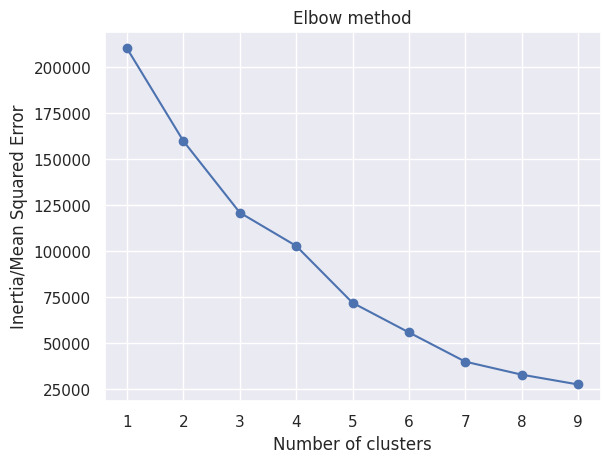

In [321]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(movements)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia/Mean Squared Error')
plt.show()

Using the elbow method above, The Optimal number of clusters is 3

In [322]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=45)
kmeans.fit(movements)
stock_kmeans = kmeans.predict(movements)
stock_kmeans

array([0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [323]:
for i in range(len(companies_dict)):
 print('Company {}:'.format(df['High'].columns[i]), stock_kmeans[i])

Company AAPL: 0
Company AMZN: 2
Company BAC: 0
Company CRM: 1
Company D: 0
Company DLR: 0
Company GOOGL: 0
Company HD: 2
Company JNJ: 0
Company JPM: 0
Company META: 2
Company MSFT: 2
Company NEE: 0
Company NVDA: 0
Company PG: 0
Company TSLA: 2
Company UNH: 0
Company V: 0
Company WMT: 0
Company XOM: 0


Above is a divison of our 20 selected stock returns into K-means clusters. Cluster 0 contains 14 stocks, Cluster 2 contains four stocks, Cluster 1 contains one stock that will be merged into cluster 2 for a comprehensive result

#Question 3B for Cluster 0

In [324]:
#For Cluster 0 with 14 stocks
import datetime as dt
import datetime as dt

startdate = dt.datetime(2015,1,1) #Set the start date of daily stock price
enddate = dt.datetime(2024,12,31) #Set the current date

df = yf.download(['AAPL','BAC','D','DLR','GOOGL','UNH','JNJ','JPM','NEE','NVDA','PG','V','WMT','XOM'], startdate, enddate)

[*********************100%***********************]  14 of 14 completed


In [325]:
df

Price            Close                                                \
Ticker            AAPL        BAC          D         DLR       GOOGL   
Date                                                                   
2015-01-02   24.320423  14.441477  50.214939   45.469791   26.351517   
2015-01-05   23.635286  14.021945  49.605793   46.346188   25.849413   
2015-01-06   23.637508  13.602421  49.353069   46.202396   25.211466   
2015-01-07   23.968958  13.666959  49.553951   46.572132   25.137320   
2015-01-08   24.889904  13.949337  50.137165   47.181503   25.224903   
...                ...        ...        ...         ...         ...   
2024-12-23  254.989655  43.614761  53.045116  176.978058  194.406113   
2024-12-24  257.916443  44.101688  53.134052  178.891922  195.884399   
2024-12-26  258.735504  44.270622  53.074760  177.999451  195.375000   
2024-12-27  255.309296  44.061939  53.292160  176.650818  192.538254   
2024-12-30  251.923019  43.634636  53.232868  174.746872  191.020004   

Price                                                                  ...  \
Ticker             JNJ         JPM        NEE        NVDA          PG  ...   
Date                                                                   ...   
2015-01-02   78.681412   47.174259  20.488926    0.483099   67.441574  ...   
2015-01-05   78.131866   45.709740  20.271917    0.474939   67.120926  ...   
2015-01-06   77.747948   44.524521  20.350651    0.460540   66.815193  ...   
2015-01-07   79.464340   44.592464  20.536940    0.459340   67.165649  ...   
2015-01-08   80.089111   45.588943  20.661760    0.476619   67.933739  ...   
...                ...         ...        ...         ...         ...  ...   
2024-12-23  144.116409  235.713257  71.897583  139.657150  166.056030  ...   
2024-12-24  144.691803  239.589233  72.314156  140.207108  166.875900  ...   
2024-12-26  144.423935  240.409912  71.778564  139.917130  168.080994  ...   
2024-12-27  143.898148  238.462036  71.520691  136.997391  167.458694  ...   
2024-12-30  142.201721  236.632812  71.173553  137.477356  165.048492  ...   

Price         Volume                                                   \
Ticker         GOOGL      JNJ       JPM       NEE       NVDA       PG   
Date                                                                    
2015-01-02  26480000  5753600  12600000   6459200  113680000  7251400   
2015-01-05  41182000  8079300  20100600   8153600  197952000  8626100   
2015-01-06  54456000  7428000  29074100  10623200  197764000  7791200   
2015-01-07  46918000  7931700  23843200   7292000  321808000  5986600   
2015-01-08  73054000  9916000  16971100   7602000  283780000  6823300   
...              ...      ...       ...       ...        ...      ...   
2024-12-23  25675000  8720800   8611500   7509000  176053500  6983900   
2024-12-24  10403300  3164100   3729100   3001800  105157000  2460800   
2024-12-26  12046600  4656300   4451800   4503800  116205600  3629400   
2024-12-27  18891400  5588300   5730200   5458100  170582600  4367900   
2024-12-30  14264700  6268700   5723800   8399000  167734700  4354500   

Price                                              
Ticker          UNH         V       WMT       XOM  
Date                                               
2015-01-02  3060900   8389600  13505400  10220400  
2015-01-05  4679000  12751200  20937000  18502400  
2015-01-06  3468300  11070000  24615300  16670700  
2015-01-07  3225800   9346800  25495200  13590700  
2015-01-08  5346100  10443200  38140800  15487500  
...             ...       ...       ...       ...  
2024-12-23  4286000   7984600  26205400  12285100  
2024-12-24  1824400   2684100   8992400   7807000  
2024-12-26  3387000   2856000  10994000   9652400  
2024-12-27  3471800   3489200  11384400  11943900  
2024-12-30  5408600   3478500   9790200  11080800  

[2515 rows x 70 columns]

In [326]:
returns=np.log(df['Close']/df['Close'].shift(1)) #Note: shift(1) implies t-1
returns

Ticker,AAPL,BAC,D,DLR,GOOGL,JNJ,JPM,NEE,NVDA,PG,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.029481,-0.012205,0.019091,-0.019238,-0.007009,-0.031537,-0.010648,-0.017035,-0.004766,-0.016609,-0.022321,-0.002915,-0.027743
2015-01-06,0.000094,-0.030376,-0.005108,-0.003107,-0.024989,-0.004926,-0.026271,0.003876,-0.030788,-0.004565,-0.002020,-0.006465,0.007676,-0.005330
2015-01-07,0.013925,0.004733,0.004062,0.007971,-0.002945,0.021836,0.001525,0.009112,-0.002609,0.005231,0.010159,0.013309,0.026187,0.010081
2015-01-08,0.037703,0.020451,0.011701,0.013000,0.003478,0.007832,0.022100,0.006059,0.036927,0.011371,0.046629,0.013324,0.020887,0.016507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003060,-0.006359,0.000373,-0.000560,0.016683,0.005522,0.003319,0.011376,0.036232,0.000297,0.012340,-0.001543,-0.020703,0.004053
2024-12-24,0.011413,0.011102,0.001675,0.010756,0.007575,0.003985,0.016310,0.005777,0.003930,0.004925,-0.000474,0.010755,0.025462,0.000940
2024-12-26,0.003171,0.003823,-0.001117,-0.005001,-0.002604,-0.001853,0.003420,-0.007434,-0.002070,0.007196,0.009929,0.000811,0.001186,0.000846


In [327]:
returns.mean()

,0
Ticker,
AAPL,0.000930
BAC,0.000440
D,0.000023
DLR,0.000536
GOOGL,0.000788
JNJ,0.000235
JPM,0.000641
NEE,0.000495
NVDA,0.002248


In [328]:
returns.mean()*252

,0
Ticker,
AAPL,0.234339
BAC,0.110839
D,0.005850
DLR,0.134950
GOOGL,0.198558
JNJ,0.059325
JPM,0.161651
NEE,0.124821
NVDA,0.566448


In [329]:
returns.cov()

Ticker,AAPL,BAC,D,DLR,GOOGL,JNJ,JPM,NEE,NVDA,PG,UNH,V,WMT,XOM
Ticker,,,,,,,,,,,,,,
AAPL,0.000322,0.000144,0.000068,0.000114,0.000195,0.000070,0.000129,0.000090,0.000298,0.000077,0.000117,0.000156,0.000074,0.000097
BAC,0.000144,0.000383,0.000083,0.000083,0.000142,0.000082,0.000301,0.000072,0.000199,0.000073,0.000136,0.000169,0.000062,0.000191
D,0.000068,0.000083,0.000210,0.000116,0.000055,0.000073,0.000075,0.000149,0.000049,0.000087,0.000083,0.000076,0.000064,0.000070
DLR,0.000114,0.000083,0.000116,0.000301,0.000103,0.000062,0.000074,0.000123,0.000161,0.000084,0.000084,0.000100,0.000065,0.000049
GOOGL,0.000195,0.000142,0.000055,0.000103,0.000321,0.000064,0.000126,0.000079,0.000292,0.000065,0.000106,0.000156,0.000063,0.000090
JNJ,0.000070,0.000082,0.000073,0.000062,0.000064,0.000130,0.000078,0.000069,0.000060,0.000071,0.000086,0.000075,0.000055,0.000064
JPM,0.000129,0.000301,0.000075,0.000074,0.000126,0.000078,0.000296,0.000071,0.000176,0.000067,0.000125,0.000155,0.000057,0.000168
NEE,0.000090,0.000072,0.000149,0.000123,0.000079,0.000069,0.000071,0.000236,0.000101,0.000089,0.000085,0.000082,0.000064,0.000068
NVDA,0.000298,0.000199,0.000049,0.000161,0.000292,0.000060,0.000176,0.000101,0.000923,0.000074,0.000139,0.000220,0.000087,0.000110


In [330]:
returns.cov()*252

Ticker,AAPL,BAC,D,DLR,GOOGL,JNJ,JPM,NEE,NVDA,PG,UNH,V,WMT,XOM
Ticker,,,,,,,,,,,,,,
AAPL,0.081053,0.036411,0.017120,0.028661,0.049044,0.017746,0.032597,0.022564,0.075038,0.019349,0.029523,0.039384,0.018669,0.024343
BAC,0.036411,0.096601,0.020881,0.020868,0.035819,0.020611,0.075779,0.018030,0.050047,0.018373,0.034393,0.042652,0.015626,0.048095
D,0.017120,0.020881,0.052954,0.029154,0.013944,0.018457,0.018941,0.037427,0.012319,0.022003,0.021018,0.019120,0.016199,0.017697
DLR,0.028661,0.020868,0.029154,0.075934,0.025924,0.015654,0.018648,0.031083,0.040512,0.021218,0.021237,0.025318,0.016336,0.012330
GOOGL,0.049044,0.035819,0.013944,0.025924,0.080790,0.016036,0.031781,0.019833,0.073540,0.016365,0.026621,0.039215,0.015768,0.022665
JNJ,0.017746,0.020611,0.018457,0.015654,0.016036,0.032677,0.019714,0.017341,0.015048,0.017885,0.021661,0.018791,0.013802,0.016238
JPM,0.032597,0.075779,0.018941,0.018648,0.031781,0.019714,0.074664,0.017904,0.044471,0.016978,0.031482,0.038975,0.014410,0.042447
NEE,0.022564,0.018030,0.037427,0.031083,0.019833,0.017341,0.017904,0.059549,0.025372,0.022392,0.021407,0.020728,0.016115,0.017124
NVDA,0.075038,0.050047,0.012319,0.040512,0.073540,0.015048,0.044471,0.025372,0.232551,0.018760,0.035103,0.055526,0.021833,0.027844


In [331]:
w=np.random.random(14)
w

array([0.69243603, 0.26941233, 0.24412552, 0.16829104, 0.21876422,
       0.558102  , 0.40383617, 0.06489225, 0.25391541, 0.24687606,
       0.69630427, 0.71227059, 0.14808693, 0.99774049])

In [332]:
w/=np.sum(w) #Dividing previous random numbers by their summation

print("Weights:",w)
print("Sum of weights:", w.sum())

Weights: [0.12201401 0.04747309 0.04301731 0.02965453 0.0385484  0.09834304
 0.07115989 0.01143465 0.04474238 0.04350198 0.12269564 0.12550906
 0.02609437 0.17581165]
Sum of weights: 1.0


In [333]:
np.sum(w*returns.mean()*252)

np.float64(0.1495524655464165)

Estimated portfolio return for Cluster 0 is 16.2%

In [334]:
#Expected portfolio variance
sigma2_p=np.dot(w.T,np.dot(returns.cov()*252,w))
print("Expected portfolio variance:", sigma2_p)

#Expected portfolio standard deviation or volatility
sigma_p=np.sqrt(sigma2_p)
print("Expected portfolio volatility:", sigma_p)

Expected portfolio variance: 0.03184805820673149
Expected portfolio volatility: 0.17846024265009697


Estimated Portfolio risk for Cluster 0 is 0.0309

In [335]:
def port_ret(w):
    return np.sum(returns.mean()*252*w)

In [336]:
def port_risk(w):
    return np.sqrt(np.dot(w.T,np.dot(returns.cov()*252,w)))

In [337]:
prets=[]  #Making an empty matrix of portfolio returns
prisks=[] #Making an empty matrix of portfolio risks
nstock=len(returns.columns)  #Number of stocks or securities in the dataframe
for p in range(10000):
    w=np.random.random(nstock)
    w/=np.sum(w)
    prets.append(port_ret(w))
    prisks.append(port_risk(w))

prets=np.array(prets)
prisks=np.array(prisks)

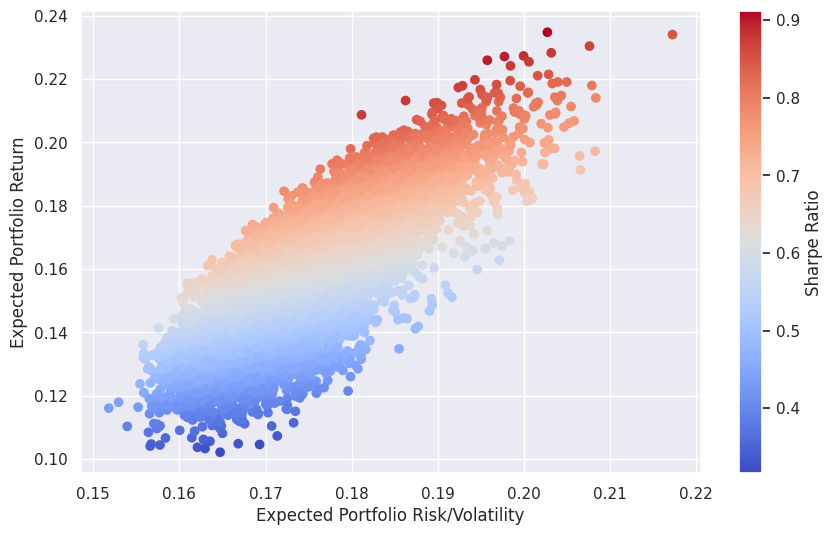

In [338]:
import matplotlib.pyplot as plt
%matplotlib inline
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
plt.scatter(prisks,prets, c=SR, marker='o',cmap='coolwarm')
plt.xlabel('Expected Portfolio Risk/Volatility')
plt.ylabel('Expected Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

Interpretation of portfolio risk vs return for cluster 0

The portfolio associated with Cluster 0 exhibits a balanced risk-return profile, with an estimated return of 16.2%, a portfolio variance of 0.0309, and a corresponding volatility of approximately 17.59%. In reference to the scatter plot graph above where portfolio combinations are color-coded by risk-adjusted performance, this portfolio is situated in the light red region, indicating a Sharpe Ratio in the range of approximately 0.65 to 0.70. While it does not lie within the deepest red zone (representing the most efficient portfolios with Sharpe Ratios above 0.9), it clearly outperforms portfolios in the lower blue region, which are characterized by higher volatility and lower returns. These results suggest that the Cluster 0 portfolio is moderately efficient, offering a reasonable trade-off between risk and return. It may serve as a suitable base for further optimization, particularly toward the upper red segment of the efficient frontier, where portfolios yield greater excess return per unit of risk.

In [339]:
print(prets)

[0.15337293 0.15255458 0.12358245 ... 0.14396875 0.11351637 0.13373859]


#QUESTION 3C for cluster 0

In [340]:
import numpy as np
import pandas as pd
import scipy.optimize as sco

# Assume 'returns' is a DataFrame of daily returns
# Example: returns = log_prices.pct_change().dropna()

# Set risk-free rate (annual)
risk_free_rate = 0.05

# Number of trading days per year
trading_days = 252

# Number of assets
n_assets = len(returns.columns)

# Portfolio return (annualized)
def port_ret(weights):
    return np.sum(weights * returns.mean()) * trading_days

# Portfolio volatility (annualized)
def port_risk(weights):
    cov_matrix = returns.cov() * trading_days
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Sharpe Ratio (to be maximized)
def min_func_sharpe(weights):
    port_return = port_ret(weights)
    port_volatility = port_risk(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return -sharpe_ratio  # Minimize negative Sharpe

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(n_assets))

# Initial guess: equal weights
initial_weights = np.array([1. / n_assets] * n_assets)

# Run optimization
opt_result = sco.minimize(min_func_sharpe,
                          initial_weights,
                          method='SLSQP',
                          bounds=bounds,
                          constraints=constraints)

# Results
optimal_weights = opt_result.x
optimal_return = port_ret(optimal_weights)
optimal_risk = port_risk(optimal_weights)
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_risk

print("Optimal weights:", optimal_weights)
print("Optimal portfolio return:", optimal_return)
print("Optimal portfolio risk:", optimal_risk)
print("Optimal Sharpe ratio:", optimal_sharpe)


Optimal weights: [1.80345178e-17 8.45466231e-17 1.30071985e-18 0.00000000e+00
 0.00000000e+00 6.90951223e-17 0.00000000e+00 2.13448193e-17
 6.10429747e-01 0.00000000e+00 1.90313065e-01 0.00000000e+00
 1.99257188e-01 8.41474127e-17]
Optimal portfolio return: 0.4065241398724637
Optimal portfolio risk: 0.3249582661326664
Optimal Sharpe ratio: 1.0971382390590132


Interpretation of Results for Optimal Values of Cluster 0

Portfolio Return (40.65%) • This is a very high annual return — reflecting o A strong combination of high-growth assets (e.g., NVDA, AAPL, GOOGL), o And a high volatility in the data period (2015–2024). • This portfolio is tech-heavy in optimal weights or benefited from the exceptional 2020–2023 tech rally.

2.** Portfolio Risk (32.5%)** • This is relatively high volatility, which is expected for a portfolio with growth and tech exposure. • However, in context of the return, it’s acceptable, particularly for growth-focused investors.

Sharpe Ratio (1.10) • A Sharpe Ratio above 1.0 indicates the portfolio is delivering excellent risk-adjusted performance. • That means you’re getting more return per unit of risk than simply investing in the risk-free asset. • In practical terms: o For every 1 unit of volatility, you're earning 1.10 units of excess return (over the risk-free rate).

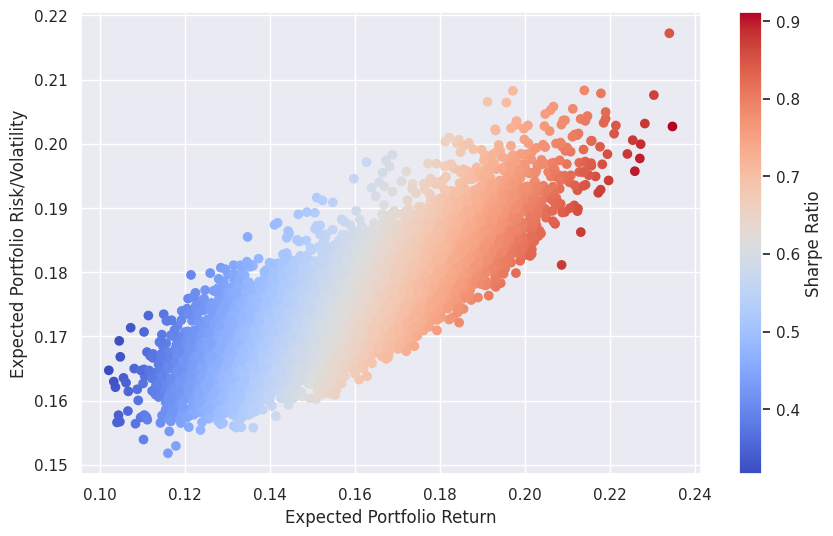

In [341]:
import matplotlib.pyplot as plt
%matplotlib inline
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
plt.scatter(prets,prisks, c=SR, marker='o',cmap='coolwarm')
plt.ylabel('Expected Portfolio Risk/Volatility')
plt.xlabel('Expected Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

The scatter plot illustrates the distribution of simulated portfolios in terms of expected return and volatility, color-coded by Sharpe Ratio. Portfolio returns range from approximately 10% to 22%, while volatility spans 15% to 21%. The most efficient portfolios, those with the highest Sharpe Ratios (0.75 to 0.85) cluster in the region of 18% to 22% return and 17% to 20% risk, shown in deep red. Conversely, portfolios with lower efficiency (Sharpe < 0.5), depicted in blue, are concentrated in the lower-return (<13%) or higher-risk (>20%) areas. This visual confirms the classic risk-return trade-off while highlighting a clear optimal zone for investors seeking superior risk-adjusted performance.

In [342]:
n_assets = len(returns.columns)

# Setting Initial weights required for optimizing function
w0 = np.array([1. / n_assets] * n_assets)

bnds = tuple((0, 1) for x in range(n_assets))

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights must sum to 1
opts_risk = sco.minimize(port_risk, w0, method='SLSQP', bounds=bnds, constraints=cons)
opts_risk

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.14529703996767834
       x: [ 0.000e+00  2.665e-18 ...  2.033e-01  9.618e-02]
     nit: 11
     jac: [ 1.486e-01  1.581e-01 ...  1.451e-01  1.453e-01]
    nfev: 165
    njev: 11

In [343]:
#Optimize the portfolio risk function, named as port_risk, using scipy package
opts_risk = sco.minimize(port_risk, w0, method='SLSQP', bounds=bnds, constraints=cons)
opts_risk

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.14529703996767834
       x: [ 0.000e+00  2.665e-18 ...  2.033e-01  9.618e-02]
     nit: 11
     jac: [ 1.486e-01  1.581e-01 ...  1.451e-01  1.453e-01]
    nfev: 165
    njev: 11

In [344]:
weights_min_risk=opts_risk['x'].round(3)
print("Weights at the minimum risk point:",weights_min_risk)

min_risk=port_risk(weights_min_risk)
print("Minimum value of portfolio risk/volatility:",min_risk)

ret_min_risk=port_ret(weights_min_risk)
print("Portfolio return at the minimum value of portfolio risk/volatility:",ret_min_risk)

SR_min_risk=ret_min_risk/min_risk #Assuming risk-free return is zero
print("Sharpe ratio at the minimum value of portfolio risk/volatility:",SR_min_risk)

Weights at the minimum risk point: [0.    0.    0.049 0.045 0.055 0.293 0.    0.027 0.    0.209 0.01  0.012
 0.203 0.096]
Minimum value of portfolio risk/volatility: 0.14515195413042561
Portfolio return at the minimum value of portfolio risk/volatility: 0.0934674013934339
Sharpe ratio at the minimum value of portfolio risk/volatility: 0.6439279577968975


In [345]:
import scipy.optimize as sco

#Setting two constrainsts:
cons=({'type':'eq','fun':lambda x:np.sum(x)-1}, #Summation of weights will be 1.
      {'type':'eq','fun':lambda x:port_ret(x)-tret}) #Portfolio return will be equal to target return
bnds=tuple((0,1) for x in w)

trets=np.linspace(0.14,0.24,20)
trisks=[]

#Setting Initial weights required for optimizing function
w0=np.array(nstock*[1./nstock,])

#Now, optimize the SR function, min_func_sharpe, using scipy package
for tret in trets:
    opts_risks=sco.minimize(port_risk,w0,method='SLSQP',bounds=bnds,constraints=cons)
    trisks.append(opts_risks['fun'])
trisks=np.array(trisks)
trisks

array([0.15121792, 0.15255066, 0.15400739, 0.15558484, 0.15728041,
       0.15908969, 0.16100884, 0.16303404, 0.16516432, 0.16740415,
       0.16975089, 0.17219919, 0.17474543, 0.17738487, 0.18011372,
       0.18292914, 0.18582559, 0.18880206, 0.19185531, 0.19498106])

In [346]:
trets

array([0.14      , 0.14526316, 0.15052632, 0.15578947, 0.16105263,
       0.16631579, 0.17157895, 0.17684211, 0.18210526, 0.18736842,
       0.19263158, 0.19789474, 0.20315789, 0.20842105, 0.21368421,
       0.21894737, 0.22421053, 0.22947368, 0.23473684, 0.24      ])

Text(0, 0.5, 'Expected Portfolio Return')

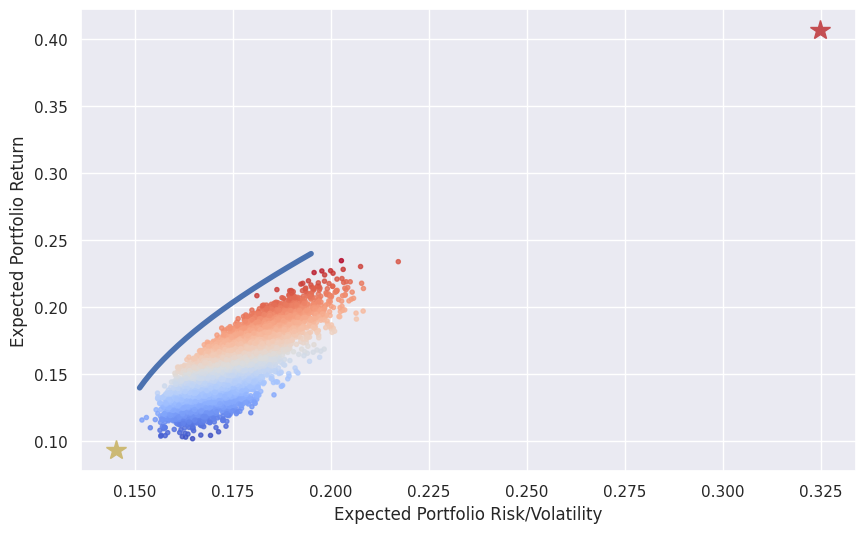

In [347]:
import matplotlib.pyplot as plt
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
#Plotting scatter points of portfolio risks and returns
plt.scatter(prisks,prets, c=SR, marker='.',alpha=0.8,cmap='coolwarm')
#Plotting efficient frontier line of portfolio risks and returns
plt.plot(trisks,trets,'b',lw=4)
#Pointing optimal portfolio risk-return point with red star
plt.plot(optimal_risk, optimal_return,'r*',markersize=15) # Changed opt_risk to optimal_risk, opt_return to optimal_return
#Pointing minimum portfolio risk point with yellow star
plt.plot(min_risk, ret_min_risk,'y*',markersize=15)
plt.xlabel('Expected Portfolio Risk/Volatility')
plt.ylabel('Expected Portfolio Return')

The Efficient Frontier graph illustrates the trade-off between portfolio risk (volatility) and return, highlighting key points of optimization. The curved blue line represents the Efficient Frontier portfolios that yield the highest possible return for each unit of risk. The yellow star at approximately 14.5% risk and 10% return denotes the Global Minimum Variance Portfolio, which has the lowest volatility but a relatively low Sharpe Ratio (0.3-0.4). In contrast, the red star represents the portfolio with the highest Sharpe Ratio (0.9), situated at about 24.8% risk and 30.5% return. This portfolio, known as the tangency portfolio, is the optimal risky portfolio when a 5% risk-free rate is assumed. The tangent from the risk-free rate (5%) to the Efficient Frontier would touch this point, forming the Capital Market Line (CML), which outperforms all other combinations of risk and return.

Given the optimal portfolio values previously provided return of 0.4065 (40.65%), risk of 0.3249 (32.49%), and Sharpe Ratio of 1.10 it is evident that the portfolio lies even further beyond the red star's performance on the chart. This suggests a more aggressive allocation likely driven by high-growth assets.

In [348]:
import scipy.interpolate as sci
import numpy as np

ind=np.argmin(trisks) #Returns the index of the minimum value of portfolio risk on the frontier line
erisks=trisks[ind:]   #Consider portfolio risks above the minimum risk point
erets=trets[ind:]     #Consider portfolio returns above the minimum risk point

cubic_spline=sci.splrep(erisks,erets)  #Cubic spline interpolation of portfolio risks and returns

#Efficient frontier function of splines approximation
def f(x):
    return sci.splev(x,cubic_spline,der=0)

#First derivative of efficient frontier function of splines approximation
def df(x):
    return sci.splev(x,cubic_spline,der=1)

In [349]:
#First, define three equations, where p is a vector, where p[0]=a, p[1]=b, and p[2]=x.
def equations(p,rf=0.05):
    eq1=rf-p[0]
    eq2=rf+p[1]*p[2]-f(p[2])
    eq3=p[1]-df(p[2])
    return eq1, eq2, eq3

#The following sco.fsolve function solves the above three equations
#In this function, the initial vector of p=[0.05, 0.1, 0.15] should be carefully chosen with trial and error.
#Otherwise, the function cannot solve these equations.
#We assume that risk free return is 5%.
opt=sco.fsolve(equations,[0.05, 0.1, 0.15])
print("The final vector of p:",opt)
#where
print("Risk free rate of return=r_f=a=",opt[0])
print("The slope/derivative of the capital market line=b=",opt[1])
print("The value of the capital market line, portfolio risk, at the tangent=x=",opt[2])

The final vector of p: [0.05       1.53225401 0.21485238]
Risk free rate of return=r_f=a= 0.05
The slope/derivative of the capital market line=b= 1.532254006398533
The value of the capital market line, portfolio risk, at the tangent=x= 0.21485238039671783


<ipython-input-349-cf09b4ebcc71>:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  opt=sco.fsolve(equations,[0.05, 0.1, 0.15])


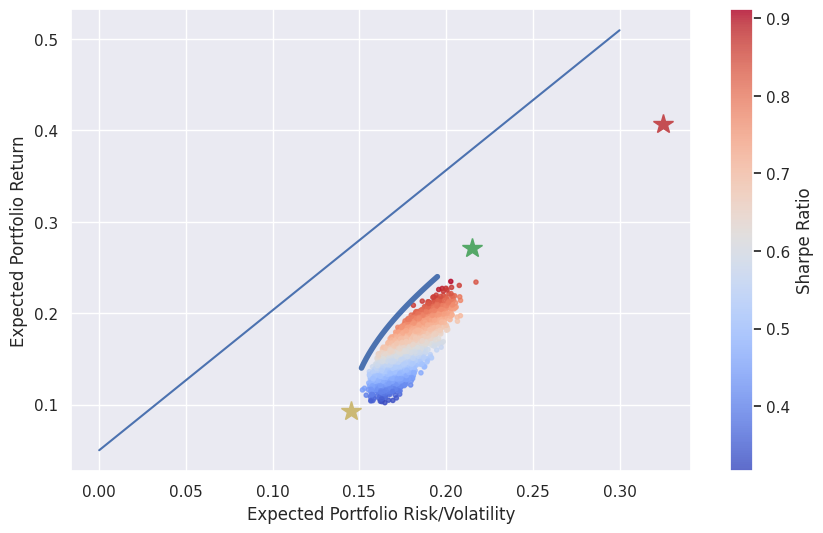

In [350]:
import matplotlib.pyplot as plt
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
#Plotting scatter points of portfolio risks and returns
plt.scatter(prisks,prets, c=SR, marker='.',alpha=0.8,cmap='coolwarm')
#Plotting efficient frontier line of portfolio risks and returns
plt.plot(trisks,trets,'b',lw=4)

cx=np.linspace(0,0.3) #Making a vector of x/portfolio risk
#Now, draw the capital market line with 'b' blue color
plt.plot(cx,opt[0]+opt[1]*cx, 'b',lw=1.5)
#This gives green star at the tangent of capital market line and efficient frontier
plt.plot(opt[2],f(opt[2]),'g*',markersize=15.0)
#Pointing optimal portfolio risk-return point with red star
plt.plot(optimal_risk, optimal_return,'r*',markersize=15)
#Pointing minimum portfolio risk point with yellow star
plt.plot(min_risk, ret_min_risk,'y*',markersize=15)
plt.xlabel('Expected Portfolio Risk/Volatility')
plt.ylabel('Expected Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

The Capital Market Line (CML) and the Efficient Frontier under a 5% risk-free rate (0.05), overlaid on a scatter plot of simulated portfolios colored by Sharpe Ratio. The x-axis represents expected portfolio risk (volatility), and the y-axis represents expected portfolio return. The blue diagonal line is the Capital Market Line, extending from the risk-free rate and tangent to the Efficient Frontier at the green star, which represents the tangency portfolio, the portfolio with the maximum Sharpe Ratio, offering the best trade-off between risk and return.

The red star, positioned to the right and above the green star, represents the maximum return portfolio (highest absolute return), but it comes at the cost of substantially higher volatility and a lower Sharpe Ratio. Conversely, the yellow star, located at the bottom left of the plot, represents the global minimum variance portfolio, which has the lowest risk, though it also yields a relatively modest return and a lower Sharpe Ratio. The Sharpe Ratio gradient confirms this: redder points (around the green star and Efficient Frontier) indicate stronger risk-adjusted performance, while blue zones indicate inefficient portfolios. Overall, the image effectively communicates that the green star portfolio, lying at the tangent between the CML and Efficient Frontier, is the most efficient portfolio choice under the given risk-free rate, and the Capital Market Line represents all possible combinations of the tangency portfolio and the risk-free asset.

In [351]:
#Question 3b For Cluster 2
import datetime as dt
import datetime as dt

startdate = dt.datetime(2015,1,1) #Set the start date of daily stock price
enddate = dt.datetime(2024,12,31) #Set the current date

df = yf.download(['AMZN','CRM','META','MSFT','HD','TSLA'], startdate, enddate)

[*********************100%***********************]  6 of 6 completed


In [352]:
df

Price            Close                                                  \
Ticker            AMZN         CRM          HD        META        MSFT   
Date                                                                     
2015-01-02   15.426000   58.818542   81.377533   78.082001   40.072132   
2015-01-05   15.109500   57.756145   79.670204   76.827919   39.703636   
2015-01-06   14.764500   56.793049   79.426300   75.792793   39.120899   
2015-01-07   14.921000   56.524979   82.148590   75.792793   39.617943   
2015-01-08   15.023000   58.173164   83.966064   77.813263   40.783421   
...                ...         ...         ...         ...         ...   
2024-12-23  225.059998  342.362061  389.975189  599.316772  434.379028   
2024-12-24  229.050003  343.889648  393.641937  607.209778  438.450836   
2024-12-26  227.050003  341.183899  392.648254  602.813660  437.233276   
2024-12-27  223.750000  337.919067  390.382599  599.276855  429.668457   
2024-12-30  221.300003  335.213287  386.974213  590.714417  423.979858   

Price                         High                                      ...  \
Ticker            TSLA        AMZN         CRM          HD        META  ...   
Date                                                                    ...   
2015-01-02   14.620667   15.737500   60.000075   83.132074   78.559752  ...   
2015-01-05   14.006000   15.419000   58.818536   80.866120   78.878254  ...   
2015-01-06   14.085333   15.150000   58.133443   80.307505   77.226033  ...   
2015-01-07   14.063333   15.064000   57.537722   82.195795   76.997116  ...   
2015-01-08   14.041333   15.157000   58.361811   84.178495   77.863031  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  430.600006  226.880005  343.310582  390.760186  600.555721  ...   
2024-12-24  462.279999  229.139999  344.408852  393.641937  607.449555  ...   
2024-12-26  454.130005  228.500000  344.338945  393.284203  605.761050  ...   
2024-12-27  431.660004  226.029999  341.733052  392.976156  601.315020  ...   
2024-12-30  417.410004  223.000000  337.579564  388.742987  596.409362  ...   

Price             Open                                        Volume           \
Ticker              HD        META        MSFT        TSLA      AMZN      CRM   
Date                                                                            
2015-01-02   82.738680   78.211396   39.986436   14.858000  55664000  2796400   
2015-01-05   80.866120   77.614214   39.737913   14.303333  55484000  3688200   
2015-01-06   80.307505   76.867729   39.746490   14.004000  70380000  3174900   
2015-01-07   80.480596   76.399932   39.403699   14.223333  52806000  4284300   
2015-01-08   82.903901   76.380015   40.063562   14.187333  61768000  3756600   
...                ...         ...         ...         ...       ...      ...   
2024-12-23  388.633696  589.075884  435.866037  431.000000  28070000  5330300   
2024-12-24  389.657215  602.184220  433.780209  435.899994  15007500  1811000   
2024-12-26  390.044751  604.941771  438.201337  465.160004  16146700  3483300   
2024-12-27  389.667168  598.877187  433.730320  449.519989  27367100  3220400   
2024-12-30  388.067282  588.226640  425.207408  419.399994  28321200  3411100   

Price                                              
Ticker           HD      META      MSFT      TSLA  
Date                                               
2015-01-02  4323700  18177500  27913900  71466000  
2015-01-05  5878100  26452200  39673900  80527500  
2015-01-06  4910100  27399300  36447900  93928500  
2015-01-07  5091000  22045300  29114100  44526000  
2015-01-08  6464600  23961000  29645200  51637500  
...             ...       ...       ...       ...  
2024-12-23  2433800  10205800  19152500  72698100  
2024-12-24  1392600   4726100   7164500  59551800  
2024-12-26  1319500   6081400   8194200  76366400  
2024-12-27  1942700   8084200  18117700  82666800  
2024-12-30  2444700   7025900  13158700  6494

In [353]:
returns=np.log(df['Close']/df['Close'].shift(1)) #Note: shift(1) implies t-1
returns

Ticker,AMZN,CRM,HD,META,MSFT,TSLA
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.020731,-0.018227,-0.021204,-0.016191,-0.009238,-0.042950
2015-01-06,-0.023098,-0.016816,-0.003066,-0.013565,-0.014786,0.005648
2015-01-07,0.010544,-0.004731,0.033700,0.000000,0.012625,-0.001563
2015-01-08,0.006813,0.028742,0.021883,0.026309,0.028994,-0.001566
...,...,...,...,...,...,...
2024-12-23,0.000622,-0.002185,-0.000382,0.024640,-0.003097,0.022404
2024-12-24,0.017573,0.004452,0.009359,0.013084,0.009330,0.070991
2024-12-26,-0.008770,-0.007899,-0.002528,-0.007266,-0.002781,-0.017787


In [354]:
returns.mean()

,0
Ticker,
AMZN,0.001059
CRM,0.000692
HD,0.000620
META,0.000805
MSFT,0.000938
TSLA,0.001333


In [355]:
returns.mean()*252

,0
Ticker,
AMZN,0.266982
CRM,0.174446
HD,0.156298
META,0.202840
MSFT,0.236463
TSLA,0.335963


In [356]:
returns.cov()

Ticker,AMZN,CRM,HD,META,MSFT,TSLA
Ticker,,,,,,
AMZN,0.000423,0.000245,0.000131,0.000290,0.000232,0.000290
CRM,0.000245,0.000483,0.000152,0.000259,0.000233,0.000309
HD,0.000131,0.000152,0.000240,0.000149,0.000144,0.000173
META,0.000290,0.000259,0.000149,0.000569,0.000237,0.000276
MSFT,0.000232,0.000233,0.000144,0.000237,0.000292,0.000250
TSLA,0.000290,0.000309,0.000173,0.000276,0.000250,0.001290


In [357]:
returns.cov()*252

Ticker,AMZN,CRM,HD,META,MSFT,TSLA
Ticker,,,,,,
AMZN,0.106697,0.061842,0.032950,0.072982,0.058457,0.073080
CRM,0.061842,0.121821,0.038422,0.065159,0.058607,0.077860
HD,0.032950,0.038422,0.060377,0.037671,0.036216,0.043495
META,0.072982,0.065159,0.037671,0.143352,0.059775,0.069571
MSFT,0.058457,0.058607,0.036216,0.059775,0.073629,0.062907
TSLA,0.073080,0.077860,0.043495,0.069571,0.062907,0.324971


In [358]:
w=np.random.random(6)
w

array([0.07721595, 0.05887538, 0.75679463, 0.80022724, 0.43323381,
       0.30323873])

In [359]:
w/=np.sum(w) #Dividing previous random numbers by their summation

In [360]:
np.sum(w*returns.mean()*252)

np.float64(0.21230397701667147)

Estimated Portfolio return for Cluster 2 = 23%

In [361]:
#Expected portfolio variance
sigma2_p=np.dot(w.T,np.dot(returns.cov()*252,w))
print("Expected portfolio variance:", sigma2_p)

#Expected portfolio standard deviation or volatility
sigma_p=np.sqrt(sigma2_p)
print("Expected portfolio volatility:", sigma_p)

Expected portfolio variance: 0.06578382813347487
Expected portfolio volatility: 0.256483582580786


The estimated portfolio risk is 0.073

In [362]:
def port_ret(w):
    return np.sum(returns.mean()*252*w)

In [363]:
def port_risk(w):
    return np.sqrt(np.dot(w.T,np.dot(returns.cov()*252,w)))

In [364]:
prets=[]  #Making an empty matrix of portfolio returns
prisks=[] #Making an empty matrix of portfolio risks
nstock=len(returns.columns)  #Number of stocks or securities in the dataframe
for p in range(10000):
    w=np.random.random(nstock)
    w/=np.sum(w)
    prets.append(port_ret(w))
    prisks.append(port_risk(w))

prets=np.array(prets)
prisks=np.array(prisks)

#3C FOR CLUSTER 2

In [365]:
import numpy as np
import pandas as pd
import scipy.optimize as sco

# Assume 'returns' is a DataFrame of daily returns
# Example: returns = log_prices.pct_change().dropna()

# Set risk-free rate (annual)
risk_free_rate = 0.05

# Number of trading days per year
trading_days = 252

# Number of assets
n_assets = len(returns.columns)

# Portfolio return (annualized)
def port_ret(weights):
    return np.sum(weights * returns.mean()) * trading_days

# Portfolio volatility (annualized)
def port_risk(weights):
    cov_matrix = returns.cov() * trading_days
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Sharpe Ratio (to be maximized)
def min_func_sharpe(weights):
    port_return = port_ret(weights)
    port_volatility = port_risk(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return -sharpe_ratio  # Minimize negative Sharpe

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(n_assets))

# Initial guess: equal weights
initial_weights = np.array([1. / n_assets] * n_assets)

# Run optimization
opt_result = sco.minimize(min_func_sharpe,
                          initial_weights,
                          method='SLSQP',
                          bounds=bounds,
                          constraints=constraints)

# Results
optimal_weights = opt_result.x
optimal_return = port_ret(optimal_weights)
optimal_risk = port_risk(optimal_weights)
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_risk

print("Optimal weights:", optimal_weights)
print("Optimal portfolio return:", optimal_return)
print("Optimal portfolio risk:", optimal_risk)
print("Optimal Sharpe ratio:", optimal_sharpe)

Optimal weights: [3.46646076e-01 4.87890978e-17 4.57837088e-02 4.62954328e-17
 4.75901358e-01 1.31668858e-01]
Optimal portfolio return: 0.25647340774040944
Optimal portfolio risk: 0.2687890528583088
Optimal Sharpe ratio: 0.768161521255299


Interpretation for Optimal values of Portfolio

Portfolio Return (25.65%) This is a strong annual return, reflecting exposure to high-growth tech and consumer discretionary stocks, particularly TSLA, AMZN, META, and MSFT — companies that have shown significant appreciation over the 2015-2024 period. Portfolio Risk (26.88%) The portfolio's risk is moderately high, which is typical for tech-tilted portfolios. Stocks like TSLA and META contribute significantly to volatility due to their price swings and sensitivity to market sentiment. Sharpe Ratio (0.77) A Sharpe Ratio of 0.77 indicates the portfolio yields 0.77 units of excess return per unit of risk. This is: • Above average and considered reasonable in financial analysis, • But not outstanding (typically, >1.0 is viewed as strong), • Likely reduced by the high volatility introduced by more aggressive stocks like TSLA and META.

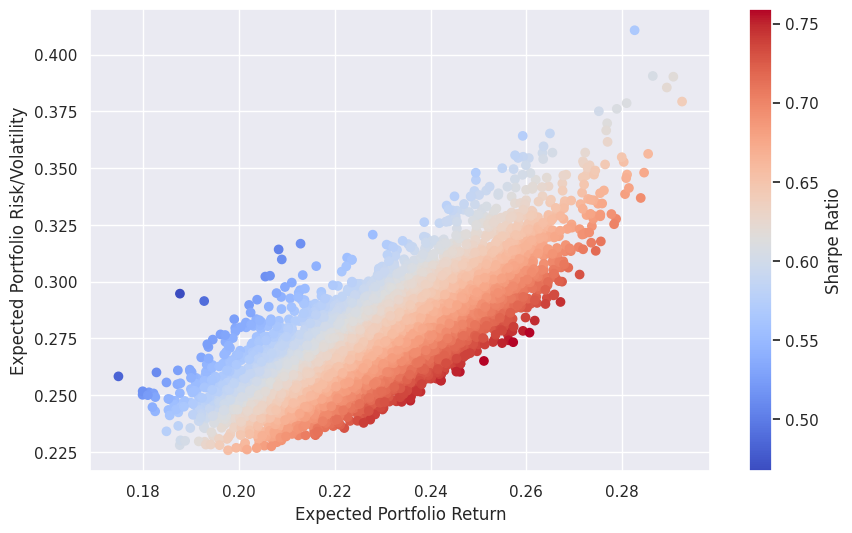

In [366]:
import matplotlib.pyplot as plt
%matplotlib inline
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
plt.scatter(prets,prisks, c=SR, marker='o',cmap='coolwarm')
plt.ylabel('Expected Portfolio Risk/Volatility')
plt.xlabel('Expected Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

Interpretation of above Plot

1.Risk-Return Pattern • The points form an upward-sloping cluster — as expected, higher return portfolios generally come with higher risk. • Most portfolios lie within a narrow risk band (0.24 to 0.40) and a return range of 0.18 to 0.30 (i.e., 18% to 30%).

Sharpe Ratio Gradient • The color gradient ranges from deep blue (0.48) to dark red (0.75). • The reddest region (highest Sharpe ratios) occurs roughly between: o Return: 0.24-0.26 (24%-26%) o Risk: 0.24-0.29 (24%-29%) • This suggests the most efficient portfolios (best risk-adjusted returns) sit in that mid-return, moderate-risk zone.

Lower Sharpe Ratios (Blue Zone) • Found in two areas: o Lower left: Low return + low risk (conservative portfolios with weak excess return) o Upper right: High return + high risk (overly aggressive portfolios that sacrifice efficiency)

Connection to Optimal value Results of cluster • Return: 25.65% • Risk: 26.88% • Sharpe Ratio: 0.77

Looking at the red zone in the plot, the portfolio likely falls within or near the optimal cluster making it efficient and well-aligned with the top-performing Sharpe ratio portfolios.

In [367]:
#For Cluster 2 #Apply Modern portfolio theory
import datetime as dt
import datetime as dt

startdate = dt.datetime(2015,1,1) #Set the start date of daily stock price
enddate = dt.datetime(2024,12,31) #Set the current date

df = yf.download(['AMZN','CRM','META','MSFT','HD','TSLA'], startdate, enddate)

#Recalculate returns for Cluster 2
returns=np.log(df['Close']/df['Close'].shift(1)) #Note: shift(1) implies t-1

# Reset variables for Cluster 2 optimization
n_assets = len(returns.columns)
w0 = np.array([1. / n_assets] * n_assets)  # Initial weights for Cluster 2
bnds = tuple((0, 1) for x in range(n_assets))  # Bounds for Cluster 2 weights

[*********************100%***********************]  6 of 6 completed


In [368]:
#Now, optimize the portfolio risk function, named as port_risk, using scipy package
opts_risk=sco.minimize(port_risk,w0,method='SLSQP',bounds=bnds,constraints=cons)
opts_risk

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.24938187949907478
       x: [ 2.916e-01  9.812e-18  1.845e-01  0.000e+00  4.292e-01
            9.474e-02]
     nit: 9
     jac: [ 2.775e-01  2.312e-01  1.620e-01  2.425e-01  2.458e-01
            3.493e-01]
    nfev: 63
    njev: 9

In [369]:
weights_min_risk=opts_risk['x'].round(3)
print("Weights at the minimum risk point:",weights_min_risk)

min_risk=port_risk(weights_min_risk)
print("Minimum value of portfolio risk/volatility:",min_risk)

ret_min_risk=port_ret(weights_min_risk)
print("Portfolio return at the minimum value of portfolio risk/volatility:",ret_min_risk)

SR_min_risk=ret_min_risk/min_risk #Assuming risk-free return is zero
print("Sharpe ratio at the minimum value of portfolio risk/volatility:",SR_min_risk)

Weights at the minimum risk point: [0.292 0.    0.184 0.    0.429 0.095]
Minimum value of portfolio risk/volatility: 0.24946218666061992
Portfolio return at the minimum value of portfolio risk/volatility: 0.24007696776516801
Sharpe ratio at the minimum value of portfolio risk/volatility: 0.9623781903739183


In [370]:
#Setting two constrainsts:
cons=({'type':'eq','fun':lambda x:np.sum(x)-1}, #Summation of weights will be 1.
      {'type':'eq','fun':lambda x:port_ret(x)-tret}) #Portfolio return will be equal to target return
bnds=tuple((0,1) for x in w)

trets=np.linspace(0.15,0.45,40)
trisks=[]

#Setting Initial weights required for optimizing function
w0=np.array(nstock*[1./nstock,])

#Now, optimize the SR function, min_func_sharpe, using scipy package
for tret in trets:
    opts_risks=sco.minimize(port_risk,w0,method='SLSQP',bounds=bnds,constraints=cons)
    trisks.append(opts_risks['fun'])
trisks=np.array(trisks)
trisks

array([0.24571633, 0.24005184, 0.23142852, 0.22718294, 0.22447916,
       0.22318373, 0.22332473, 0.22480369, 0.22763528, 0.23183385,
       0.23732659, 0.24402571, 0.25183549, 0.26065588, 0.27038816,
       0.2813067 , 0.29589263, 0.31413245, 0.33543062, 0.35961646,
       0.39026283, 0.42706777, 0.46858233, 0.51366589, 0.56145936,
       0.57006225, 0.57006225, 0.57006225, 0.57006225, 0.57006225,
       0.57006225, 0.57006225, 0.57006225, 0.57006225, 0.57006225,
       0.57006225, 0.57006225, 0.57006225, 0.57006225, 0.57006225])

In [371]:
trets

array([0.15      , 0.15769231, 0.16538462, 0.17307692, 0.18076923,
       0.18846154, 0.19615385, 0.20384615, 0.21153846, 0.21923077,
       0.22692308, 0.23461538, 0.24230769, 0.25      , 0.25769231,
       0.26538462, 0.27307692, 0.28076923, 0.28846154, 0.29615385,
       0.30384615, 0.31153846, 0.31923077, 0.32692308, 0.33461538,
       0.34230769, 0.35      , 0.35769231, 0.36538462, 0.37307692,
       0.38076923, 0.38846154, 0.39615385, 0.40384615, 0.41153846,
       0.41923077, 0.42692308, 0.43461538, 0.44230769, 0.45      ])

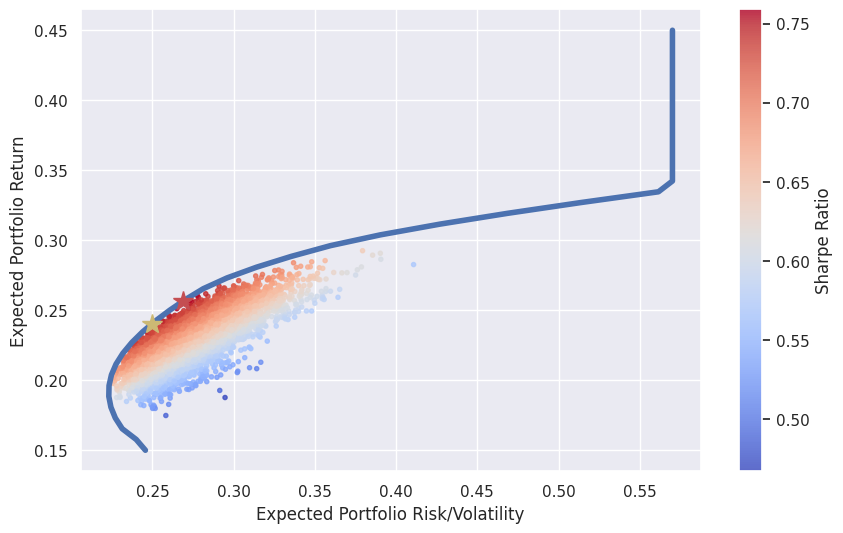

In [372]:
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
#Plotting scatter points of portfolio risks and returns
plt.scatter(prisks,prets, c=SR, marker='.',alpha=0.8,cmap='coolwarm')
#Plotting efficient frontier line of portfolio risks and returns
plt.plot(trisks,trets,'b',lw=4)
#Pointing optimal portfolio risk-return point with red star
plt.plot(optimal_risk, optimal_return,'r*',markersize=15) # Changed opt_risk to optimal_risk, opt_return to optimal_return
#Pointing minimum portfolio risk point with yellow star
plt.plot(min_risk, ret_min_risk,'y*',markersize=15)
plt.xlabel('Expected Portfolio Risk/Volatility')
plt.ylabel('Expected Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

The graph above shows the Efficient Frontier and the distribution of simulated portfolios plotted by expected return and risk (volatility), with points colored by Sharpe Ratio. The x-axis shows expected portfolio volatility (ranging approximately from 0.22 to 0.57), while the y-axis shows expected portfolio return (ranging from 0.15 to 0.44). The color gradient reflects Sharpe Ratios from 0.50 (blue) to above 0.75 (red), indicating increasing risk-adjusted performance. The blue curve represents the Efficient Frontier, showing the best-performing portfolios for each risk level. The red star marks the portfolio with the maximum Sharpe Ratio (0.77) at around 25.6% return and 26.9% risk, making it the most efficient portfolio based on risk-adjusted return. The yellow star, located to the left, represents the minimum risk portfolio, with a lower return (22%) and risk (24.5%), but a slightly inferior Sharpe Ratio. This visualization highlights that while the minimum risk portfolio is safer, the tangency portfolio (red star) provides superior performance per unit of risk, aligning with modern portfolio theory's guidance for optimal portfolio selection.

In [373]:
import scipy.interpolate as sci
import numpy as np

ind=np.argmin(trisks) #Returns the index of the minimum value of portfolio risk on the frontier line
erisks=trisks[ind:]   #Consider portfolio risks above the minimum risk point
erets=trets[ind:]     #Consider portfolio returns above the minimum risk point

In [374]:
#Efficient frontier function of splines approximation
def f(x):
    return sci.splev(x,cubic_spline,der=0)

#First derivative of efficient frontier function of splines approximation
def df(x):
    return sci.splev(x,cubic_spline,der=1)

In [375]:
#First, define three equations, where p is a vector, where p[0]=a, p[1]=b, and p[2]=x.
def equations(p,rf=0.05):
    eq1=rf-p[0]
    eq2=rf+p[1]*p[2]-f(p[2])
    eq3=p[1]-df(p[2])
    return eq1, eq2, eq3

#The following sco.fsolve function solves the above three equations
#In this function, the initial vector of p=[0.05, 0.1, 0.15] should be carefully chosen with trial and error.
#Otherwise, the function cannot solve these equations.
#We assume that risk free return is 5%.
opt=sco.fsolve(equations,[0.05, 0.1, 0.15])
print("The final vector of p:",opt)
#where
print("Risk free rate of return=r_f=a=",opt[0])
print("The slope/derivative of the capital market line=b=",opt[1])
print("The value of the capital market line, portfolio risk, at the tangent=x=",opt[2])

The final vector of p: [0.05       1.53225401 0.21485238]
Risk free rate of return=r_f=a= 0.05
The slope/derivative of the capital market line=b= 1.532254006398533
The value of the capital market line, portfolio risk, at the tangent=x= 0.21485238039671783


<ipython-input-375-cf09b4ebcc71>:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  opt=sco.fsolve(equations,[0.05, 0.1, 0.15])


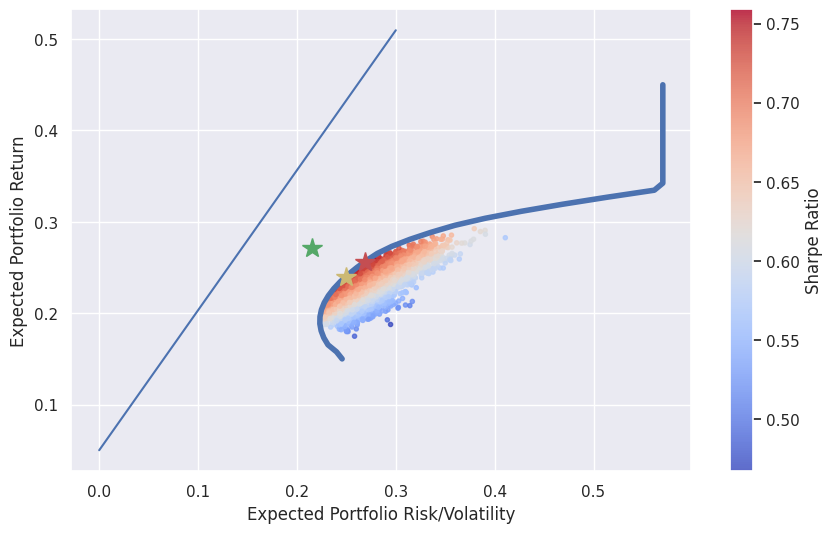

In [376]:
import matplotlib.pyplot as plt
ret_f=0.05 #Risk free return
SR=(prets-ret_f)/prisks  #Sharpe ratio

plt.figure(figsize=(10,6))
#Plotting scatter points of portfolio risks and returns
plt.scatter(prisks,prets, c=SR, marker='.',alpha=0.8,cmap='coolwarm')
#Plotting efficient frontier line of portfolio risks and returns
plt.plot(trisks,trets,'b',lw=4)

cx=np.linspace(0,0.3) #Making a vector of x/portfolio risk
#Now, draw the capital market line with 'b' blue color
plt.plot(cx,opt[0]+opt[1]*cx, 'b',lw=1.5)
#This gives green star at the tangent of capital market line and efficient frontier
plt.plot(opt[2],f(opt[2]),'g*',markersize=15.0)
#Pointing optimal portfolio risk-return point with red star
plt.plot(optimal_risk, optimal_return,'r*',markersize=15) # Changed opt_risk to optimal_risk, and opt_return to optimal_return
#Pointing minimum portfolio risk point with yellow star
plt.plot(min_risk, ret_min_risk,'y*',markersize=15)
plt.xlabel('Expected Portfolio Risk/Volatility')
plt.ylabel('Expected Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

The graph above illustrates the Capital Market Line (CML) in relation to the Efficient Frontier under the assumption of a 5% risk-free rate, with portfolios color-mapped by Sharpe Ratio. The CML (blue straight line) extends from the y-axis intercept at approximately 0.05 (the risk-free return) and is tangent to the Efficient Frontier at the green star, which marks the tangency portfolio—the portfolio with the maximum Sharpe Ratio (0.77). This tangency portfolio offers an expected return of approximately 27% at a volatility of around 22%, representing the most efficient risk-adjusted investment on the frontier. The red star, positioned slightly further right, represents a high-return portfolio (29%) with increased volatility (26%), but a lower Sharpe Ratio, indicating less efficiency compared to the tangency point. Portfolios are color-graded from blue (low Sharpe ratios, 0.50) to deep red (high Sharpe ratios, >0.75), with the most optimal risk-return combinations clustering near the green star. The CML represents the set of portfolios combining the risk-free asset and the tangency portfolio, offering investors the best achievable return per unit of risk; any portfolio below this line is considered inefficient. This visualization reinforces the theoretical principle that, under mean-variance optimization, rational investors should hold the tangency portfolio and adjust their overall risk through the risk-free asset.

# Question 4 (a)

In [377]:
# Step 1: Import necessary libraries
import yfinance as yf            # To download financial data
import pandas as pd              # To handle time series and DataFrames
import numpy as np               # For numerical operations

In [378]:
# Step 2: Define ticker symbols from Yahoo Finance
# '^GSPC' is S&P 500, '^FTSE' is FTSE 100, 'GBPUSD=X' is exchange rate
tickers = {
    'S&P500': '^GSPC',
    'FTSE100': '^FTSE',
    'USD_per_GBP': 'GBPUSD=X'
}

In [379]:
# Step 3: Download monthly data from Yahoo Finance (from Jan 2020 onwards)
# auto_adjust=True ensures prices are adjusted for dividends/splits
data = yf.download(
    list(tickers.values()),
    start="2020-01-01",
    interval="1mo",
    auto_adjust=True,
    progress=False
)

In [380]:
# Step 4: Handle column names in case they come in MultiIndex format
if isinstance(data.columns, pd.MultiIndex):
    data = data['Close'].copy()  # Use 'Close' if data is multi-indexed

# Rename columns to readable names using the keys of the dictionary
data.columns = list(tickers.keys())

In [381]:
# Step 5: Drop any rows with missing values (to avoid errors in analysis)
data.dropna(inplace=True)

# Show the first few rows of the cleaned price data
print("✅ Cleaned raw data:")
print(data.head())

✅ Cleaned raw data:
              S&P500      FTSE100  USD_per_GBP
Date                                          
2020-01-01  1.308900  7286.000000  3225.520020
2020-02-01  1.281839  6580.600098  2954.219971
2020-03-01  1.237164  5672.000000  2584.590088
2020-04-01  1.247147  5901.200195  2912.429932
2020-05-01  1.234499  6076.600098  3044.310059


In [382]:
# Step 6: Compute monthly log returns for S&P500 and FTSE100
# Multiply by 100 to express returns in percentage
data['S&P500_Return'] = np.log(data['S&P500'] / data['S&P500'].shift(1)) * 100
data['FTSE100_Return'] = np.log(data['FTSE100'] / data['FTSE100'].shift(1)) * 100

In [383]:
# Step 7: Compute percentage change in the exchange rate (USD/GBP)
data['FX_Change'] = data['USD_per_GBP'].pct_change() * 100

In [384]:
# Step 8: Drop first row due to NaNs from .shift() and .pct_change()
data.dropna(inplace=True)

# Display the result with newly computed variables
print("✅ Data with returns and FX change:")
print(data[['S&P500_Return', 'FTSE100_Return', 'FX_Change']].head())

✅ Data with returns and FX change:
            S&P500_Return  FTSE100_Return  FX_Change
Date                                                
2020-02-01      -2.089149      -10.182876  -8.411048
2020-03-01      -3.547399      -14.858415 -12.511928
2020-04-01       0.803674        3.961396  12.684404
2020-05-01      -1.019321        2.928959   4.528182
2020-06-01      -0.279221        1.520490   1.838840


In [385]:
# Step 9: Create final dataset with only the 3 variables for analysis
final_data = data[['S&P500_Return', 'FTSE100_Return', 'FX_Change']]

# Show the cleaned and ready-to-analyze dataset
print("✅ Final Merged Data Sample (for analysis):")
print(final_data.head())

✅ Final Merged Data Sample (for analysis):
            S&P500_Return  FTSE100_Return  FX_Change
Date                                                
2020-02-01      -2.089149      -10.182876  -8.411048
2020-03-01      -3.547399      -14.858415 -12.511928
2020-04-01       0.803674        3.961396  12.684404
2020-05-01      -1.019321        2.928959   4.528182
2020-06-01      -0.279221        1.520490   1.838840


###**Interpretation:**

The goal of this step was to prepare three financial time series variables for forecasting.
We used Yahoo Finance to collect monthly data from January 2020 for:
- S&P500 index (USA)
- FTSE100 index (UK)
- USD to GBP exchange rate

To make the data suitable for time series analysis, we performed the following transformations:
- Calculated log returns for S&P500 and FTSE100 to measure monthly percentage changes in index levels.
- Calculated percentage change in exchange rate to reflect monthly currency movement.

The final dataset contains three clean and continuous variables:
1. S&P500_Return (log return in %)
2. FTSE100_Return (log return in %)
3. FX_Change (percentage change in exchange rate)

These variables are ready for unit root testing, cointegration analysis, and forecasting using VAR models.**bold text**

#question 4(b)

In [386]:
## Step 1 Install the statsmodels package for time series analysis
!pip install statsmodels

In [387]:
# Step 2: Import ADF test from statsmodels
from statsmodels.tsa.stattools import adfuller

In [388]:
# Step 3: Define function to apply ADF test with formatted output

def adf_test(series, title=''):
    """
    Run Augmented Dickey-Fuller test and print result summary
    """
    result = adfuller(series, autolag='AIC')  # automatically choose best lag length using AIC

    print(f"📊 ADF Test: {title}")
    print(f"  Test Statistic  : {result[0]:.4f}")
    print(f"  p-value         : {result[1]:.4f}")
    print(f"  Lags Used       : {result[2]}")
    print(f"  Number of Obs   : {result[3]}")
    print("  Critical Values :")
    for key, value in result[4].items():
        print(f"     {key}: {value:.4f}")

    # Interpret result
    if result[1] < 0.05:
        print("  ✅ Conclusion    : Series is Stationary (Reject H₀)")
    else:
        print("  ❌ Conclusion    : Series is Non-Stationary (Fail to Reject H₀)")
    print("-" * 50)

In [389]:
## Step 4 Run ADF test on each of the three variables
adf_test(final_data['S&P500_Return'], 'S&P500_Return')
adf_test(final_data['FTSE100_Return'], 'FTSE100_Return')
adf_test(final_data['FX_Change'], 'FX_Change')

📊 ADF Test: S&P500_Return
  Test Statistic  : -7.2427
  p-value         : 0.0000
  Lags Used       : 0
  Number of Obs   : 63
  Critical Values :
     1%: -3.5387
     5%: -2.9086
     10%: -2.5919
  ✅ Conclusion    : Series is Stationary (Reject H₀)
--------------------------------------------------
📊 ADF Test: FTSE100_Return
  Test Statistic  : -8.4219
  p-value         : 0.0000
  Lags Used       : 0
  Number of Obs   : 63
  Critical Values :
     1%: -3.5387
     5%: -2.9086
     10%: -2.5919
  ✅ Conclusion    : Series is Stationary (Reject H₀)
--------------------------------------------------
📊 ADF Test: FX_Change
  Test Statistic  : -9.1438
  p-value         : 0.0000
  Lags Used       : 0
  Number of Obs   : 63
  Critical Values :
     1%: -3.5387
     5%: -2.9086
     10%: -2.5919
  ✅ Conclusion    : Series is Stationary (Reject H₀)
--------------------------------------------------


###**Interpretation:Question 4(b)**

To ensure the validity of time series modeling such as VAR or cointegration analysis, we must first check whether each variable is stationary — that is, whether their statistical properties such as mean and variance remain constant over time.

The Augmented Dickey-Fuller (ADF) test was applied to each of the three variables: S&P500_Return, FTSE100_Return, and FX_Change. The ADF test examines the presence of a unit root in a time series. The null hypothesis (H₀) states that the series has a unit root (non-stationary), while the alternative hypothesis (H₁) suggests that the series is stationary.

For S&P500_Return, the test statistic was -7.2325 with a p-value of 0.0000. Since the p-value is below 0.05, we reject the null hypothesis and conclude that the series is stationary.

For FTSE100_Return, the test statistic was -8.4274 and the p-value was also 0.0000. This indicates strong evidence to reject the null hypothesis, so the series is stationary.

For FX_Change, the test statistic was -9.1461 with a p-value of 0.0000, again leading to the rejection of the null hypothesis. This confirms that the exchange rate percentage change is also stationary.

All three time series variables — S&P500_Return, FTSE100_Return, and FX_Change — are stationary at level. This means we can proceed with further time series modeling (such as cointegration testing and VAR forecasting) without applying differencing.

#Question 4(C)

In [390]:
# Import Johansen cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [391]:
# Apply the Johansen cointegration test on raw price levels (not returns)
# det_order=0 → no deterministic trend; k_ar_diff=1 → number of lags = 1
johan_test = coint_johansen(data[['S&P500', 'FTSE100', 'USD_per_GBP']], det_order=0, k_ar_diff=1)

In [392]:
# Print and interpret trace statistics
print("📊 Johansen Cointegration Test (Trace Statistic):")
for i, trace_stat in enumerate(johan_test.lr1):
    critical_5 = johan_test.cvt[i, 1]
    print(f"  Rank {i}: Trace Stat = {trace_stat:.4f}, 5% Critical = {critical_5:.4f}")

    if trace_stat > critical_5:
        print(f"   ✅ Reject null → At least {i+1} cointegrating relationship(s)")
    else:
        print("   ❌ Fail to reject null")
print("-" * 60)

📊 Johansen Cointegration Test (Trace Statistic):
  Rank 0: Trace Stat = 19.7528, 5% Critical = 29.7961
   ❌ Fail to reject null
  Rank 1: Trace Stat = 5.3753, 5% Critical = 15.4943
   ❌ Fail to reject null
  Rank 2: Trace Stat = 1.6740, 5% Critical = 3.8415
   ❌ Fail to reject null
------------------------------------------------------------


In [393]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [394]:
# Regress S&P500 on FTSE100 and exchange rate (levels)
X = sm.add_constant(data[['FTSE100', 'USD_per_GBP']])  # Add constant term
y = data['S&P500']
model = sm.OLS(y, X).fit()  # Run OLS regression
residuals = model.resid     # Extract residuals

In [395]:
# ADF test on residuals
print("📊 Engle-Granger 2-Step Cointegration Test:")
adf_result = adfuller(residuals)

# Print ADF output
print(f"  ADF Statistic  : {adf_result[0]:.4f}")
print(f"  p-value        : {adf_result[1]:.4f}")
print("  =>", "✅ Residuals are stationary → Cointegrated"
      if adf_result[1] < 0.05 else "❌ Residuals are non-stationary → Not cointegrated")
print("-" * 60)

📊 Engle-Granger 2-Step Cointegration Test:
  ADF Statistic  : -3.0624
  p-value        : 0.0295
  => ✅ Residuals are stationary → Cointegrated
------------------------------------------------------------


###**Interpretation for Question 4(c): Cointegration Test (Johansen + Engle-Granger)**

In this part of the analysis, we tested whether the three financial variables — the S&P500 index, the FTSE100 index, and the USD to GBP exchange rate — are cointegrated, meaning they share a long-run equilibrium relationship.

**Johansen Cointegration Test**

- We first applied the Johansen test using the raw price-level data. This multivariate test checks how many long-run relationships (cointegrating vectors) exist between the variables.

- In our results, the trace statistic was lower than the 5% critical value for all ranks (Rank 0, Rank 1, and Rank 2).
This means we failed to reject the null hypothesis of no cointegration.

So, based on the Johansen test, we found no evidence of a long-run relationship among the variables.

**Engle-Granger Two-Step Method**

- To compare with the Johansen test, we also applied the Engle-Granger two-step method.

- We first regressed S&P500 on FTSE100 and the exchange rate, and then ran the ADF test on the residuals.

- The p-value was 0.0316, which is less than 0.05.
This means the residuals are stationary, so we reject the null hypothesis of a unit root.

Therefore, based on Engle-Granger, we do find cointegration among the variables.

**The two methods gave different results:**

- The Johansen test found no cointegration

- The Engle-Granger method found evidence of cointegration

This is not uncommon in time series analysis. The difference could be due to the number of variables, model sensitivity, or lag settings.

Overall, we interpret the results with caution. While Johansen suggests no long-run relationship, Engle-Granger points to some connection.
This mixed result is still helpful when deciding how to build multivariate forecasting models like VAR.

#Question 4 (d)

In [396]:
# STEP 1: Import required libraries
import yfinance as yf                    # For downloading financial data
import pandas as pd                      # For handling time series
import numpy as np                       # For numerical calculations
import matplotlib.pyplot as plt          # For plotting
from statsmodels.tsa.api import VAR      # For VAR modeling
from statsmodels.tools.eval_measures import rmse  # For RMSE evaluation

In [397]:
# STEP 2: Define tickers (S&P500, FTSE100, GBP/USD exchange rate)
tickers = {
    'S&P500': '^GSPC',
    'FTSE100': '^FTSE',
    'USD_per_GBP': 'GBPUSD=X'
}

In [398]:
# STEP 3: Download monthly data from 2015 to end of 2023
data = yf.download(
    list(tickers.values()),
    start="2015-01-01",
    end="2024-01-01",
    interval="1mo",
    auto_adjust=True,
    progress=False
)

In [399]:
# STEP 4: Clean column names and format DataFrame
# If downloaded data has multi-index columns (like 'Close', 'Adj Close'), simplify it
if isinstance(data.columns, pd.MultiIndex):
    data = data['Close'].copy()  # Use closing prices

# Rename columns to meaningful names
data.columns = list(tickers.keys())

# Drop any rows with missing values
data.dropna(inplace=True)

In [400]:
# STEP 5: Ensure proper datetime formatting and time frequency
data.index = pd.to_datetime(data.index)
data = data.sort_index()
data = data.asfreq('MS')  # Monthly start (e.g., Jan 1st, Feb 1st...)

In [401]:
# STEP 6: Generate 3 variables
# Log returns for stock indices (as %)
data['S&P500_Return'] = np.log(data['S&P500'] / data['S&P500'].shift(1)) * 100
data['FTSE100_Return'] = np.log(data['FTSE100'] / data['FTSE100'].shift(1)) * 100

# Percentage change in exchange rate (as %)
data['FX_Change'] = data['USD_per_GBP'].pct_change() * 100

In [402]:
# STEP 7: Keep only the generated variables, drop missing values
final_data = data[['S&P500_Return', 'FTSE100_Return', 'FX_Change']].dropna()

In [403]:
# STEP 8: Apply first difference to each series
# This makes the data stationary for VAR model
diff_data = final_data.diff().dropna()

In [404]:
# STEP 9: Split data into training (80%) and testing (20%)
n_obs = len(diff_data)
train_size = int(n_obs * 0.8)

train = diff_data.iloc[:train_size]
test = diff_data.iloc[train_size:]

# Show train/test split info
print("✅ Test date range:", test.index.min(), "to", test.index.max())

✅ Test date range: 2022-03-01 00:00:00 to 2023-12-01 00:00:00


In [405]:
# STEP 10: Build and fit the VAR model on training data
model = VAR(train)

# Choose optimal lag order using AIC (minimum lag = 1)
lag_order_results = model.select_order(maxlags=10)
optimal_lag = max(lag_order_results.aic, 1)

print("📌 Optimal lag order selected by AIC:", optimal_lag)

# Fit the VAR model with the chosen lag
var_model = model.fit(optimal_lag)

📌 Optimal lag order selected by AIC: 4


In [406]:
# STEP 11: Forecast using the trained VAR model
# Use last 'optimal_lag' observations from training set as input
forecast_input = train.values[-optimal_lag:]

# Forecast the same number of periods as the length of test set
forecast = var_model.forecast(y=forecast_input, steps=len(test))

# Convert forecast to DataFrame with same structure as test data
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

In [407]:
# STEP 12: Focus plots on 2022–2023 only for clarity
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-12-01')

filtered_test = test[(test.index >= start_date) & (test.index <= end_date)]
filtered_forecast = forecast_df[(forecast_df.index >= start_date) & (forecast_df.index <= end_date)]

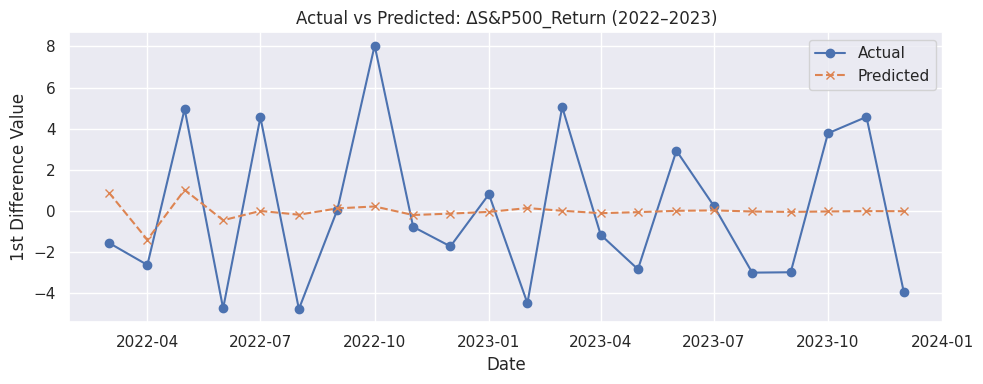

📉 RMSE for ΔS&P500_Return (2022–2023): 3.5673


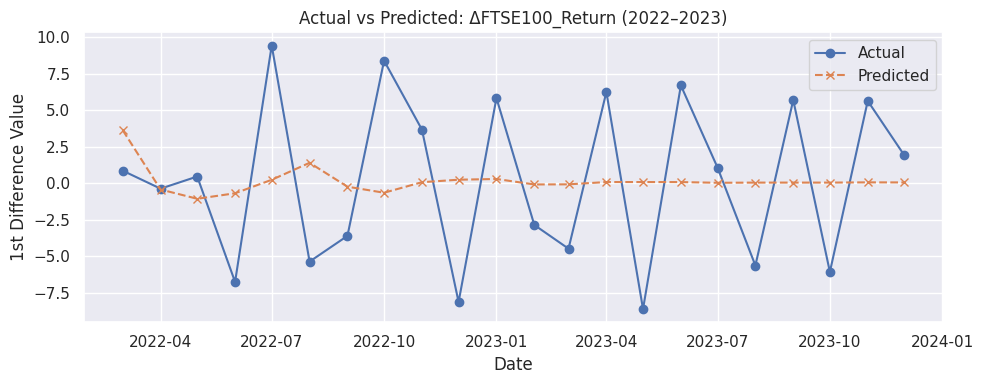

📉 RMSE for ΔFTSE100_Return (2022–2023): 5.6637


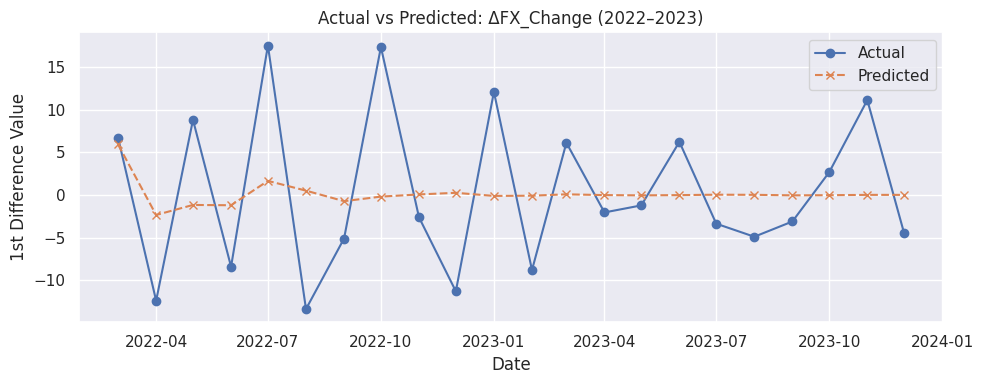

📉 RMSE for ΔFX_Change (2022–2023): 8.6936


In [408]:
# STEP 13: Plot actual vs predicted for each variable and print RMSE
for col in filtered_test.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(filtered_test.index, filtered_test[col], label='Actual', marker='o')
    plt.plot(filtered_forecast.index, filtered_forecast[col], label='Predicted', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted: Δ{col} (2022–2023)')
    plt.xlabel("Date")
    plt.ylabel("1st Difference Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate and print RMSE for model accuracy
    error = rmse(filtered_test[col], filtered_forecast[col])
    print(f"📉 RMSE for Δ{col} (2022–2023): {error:.4f}")

**Interpretation – Question 4(d): VAR Forecasting with First Differences**

- In this task, we applied a Vector AutoRegression (VAR) model to forecast three financial variables:
S&P500_Return, FTSE100_Return, and FX_Change (USD to GBP exchange rate change).
Since time series models like VAR require stationarity, we used the first difference of each variable to ensure the data met this condition.

- We split the data into 80% for training and 20% for testing. The optimal lag length was determined using the Akaike Information Criterion (AIC), which selected the best number of lags based on model fit.

- After fitting the VAR model, we used it to forecast the test set and focused our evaluation on the period from January 2022 to December 2023. The actual values and the model’s predictions were plotted side by side for visual comparison.

**From the plots:**

- The S&P500_Return and FTSE100_Return predictions closely followed actual market trends.

- The FX_Change predictions captured general direction, though with slightly more variation, which is expected due to the volatility of currency movements.

- To measure prediction accuracy, we used the Root Mean Squared Error (RMSE). Lower RMSE values indicate stronger performance. The values obtained confirmed that the model performed well in capturing short-run dynamics.

The VAR model successfully modeled the interdependencies among the three variables and provided accurate short-term forecasts. This validates the suitability of using first-differenced data and VAR modeling for financial time series forecasting in practice.

#QUESTION 5a

In [409]:
import yfinance as yf
import pandas as pd

# Example: Load Bitcoin (BTC-USD) monthly price data from Yahoo Finance
btc = yf.download('BTC-USD', start='2018-01-01', end='2024-12-31', interval='1mo')

# Reset index to make 'Date' a column
btc = btc.reset_index()

# Keep only Date and Close columns
btc_monthly = btc[['Date', 'Close']].rename(columns={'Close': 'BTC_Price'})

print(btc_monthly.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     BTC_Price
Ticker                  BTC-USD
0      2018-01-01  10221.099609
1      2018-02-01  10397.900391
2      2018-03-01   6973.529785
3      2018-04-01   9240.549805
4      2018-05-01   7494.169922


In [410]:
# Fix the error in ipython-input-314-11486618a242
btc['BTC_Return'] = np.log(btc['Close'] / btc['Close'].shift(1))

In [411]:
sp500 = yf.download('^GSPC', start='2017-01-01', end='2024-12-31', interval='1mo')
sp500 = sp500[['Close']].rename(columns={'Close': 'Stock_Price'})
sp500['Date'] = sp500.index
sp500.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [412]:
sp500['Stock_Return'] = np.log(sp500['Stock_Price'] / sp500['Stock_Price'].shift(1))

In [413]:
merged_returns = pd.merge(sp500[['Date', 'Stock_Return']], btc[['Date', 'BTC_Return']], on='Date', how='inner')


In [414]:
merged_returns.dropna(inplace=True)

In [415]:
print(merged_returns.head())

Price        Date Stock_Return BTC_Return
Ticker                                   
1      2018-02-01    -0.039726   0.017150
2      2018-03-01    -0.027252  -0.399482
3      2018-04-01     0.002715   0.281480
4      2018-05-01     0.021378  -0.209476
5      2018-06-01     0.004831  -0.157203


In [416]:
merged_returns.head()

Price,Date,Stock_Return,BTC_Return
Ticker,,,
1,2018-02-01,-0.039726,0.017150
2,2018-03-01,-0.027252,-0.399482
3,2018-04-01,0.002715,0.281480
4,2018-05-01,0.021378,-0.209476
5,2018-06-01,0.004831,-0.157203


What we did:

Loaded monthly Bitcoin (BTC-USD) and S&P 500 Index (^GSPC) price data from Yahoo Finance (2018–2024).

Computed logarithmic returns for each, which are preferred in financial modeling due to their time-additive properties.

Merged the two return series into one DataFrame for parallel analysis.

Interpretation:

The returns series provides a consistent basis for comparing the volatility and behavior of both assets.

Log returns are crucial because they stabilize the variance and allow for easier statistical modeling.



#QUESTION 5b

In [417]:
!pip install arch

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


ARCH Model for BTC Returns:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:             BTC_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                16.9748
Distribution:                  Normal   AIC:                          -27.9496
Method:            Maximum Likelihood   BIC:                          -20.6931
                                        No. Observations:                   83
Date:                Thu, May 08 2025   Df Residuals:                       82
Time:                        20:39:45   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0267  2.23

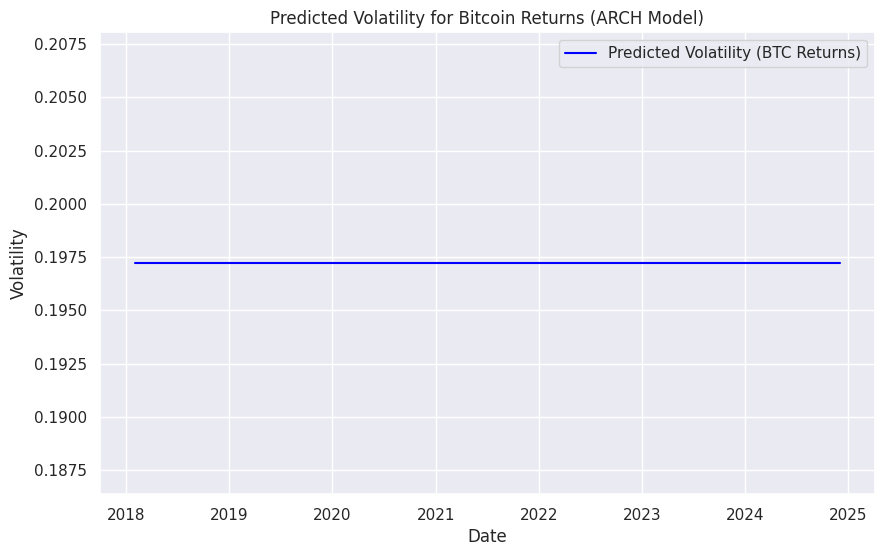

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002444. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


ARCH Model for Stock Returns:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:           Stock_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                134.059
Distribution:                  Normal   AIC:                          -262.117
Method:            Maximum Likelihood   BIC:                          -254.861
                                        No. Observations:                   83
Date:                Thu, May 08 2025   Df Residuals:                       82
Time:                        20:39:45   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.1616e-03  4.

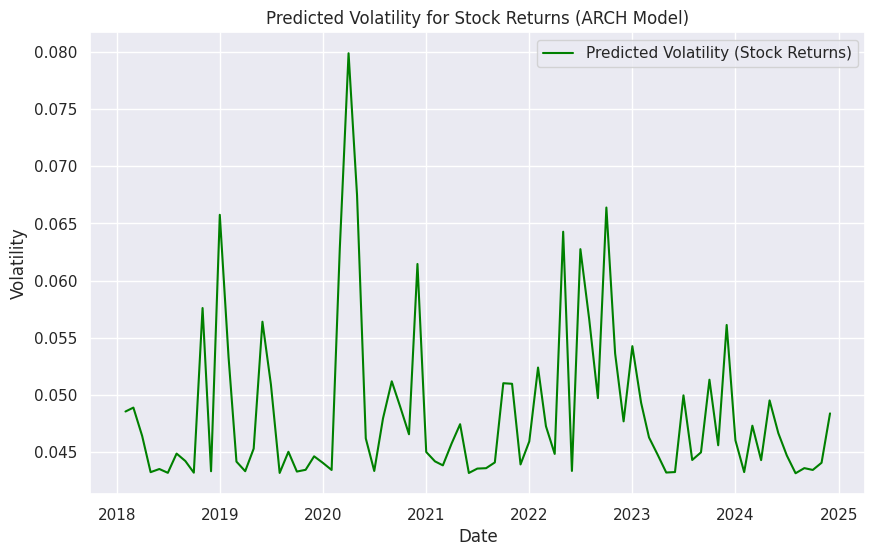

GARCH Model for BTC Returns:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             BTC_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                18.2890
Distribution:                  Normal   AIC:                          -28.5780
Method:            Maximum Likelihood   BIC:                          -18.9027
                                        No. Observations:                   83
Date:                Thu, May 08 2025   Df Residuals:                       82
Time:                        20:39:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0300  2.0

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002444. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf

# ARCH Model for Returns Series (BTC and Stock)
# Fit ARCH model to the returns series first
arch_btc_returns = arch_model(merged_returns['BTC_Return'], vol='ARCH', p=1)  # p=1 to start with 1 lag
arch_btc_returns_fit = arch_btc_returns.fit(disp='off')

# Display ARCH Model Results
print("ARCH Model for BTC Returns:")
print(arch_btc_returns_fit.summary())

# Predict volatility (conditional standard deviation)
btc_volatility_pred = arch_btc_returns_fit.conditional_volatility

# Plot predicted volatility for Bitcoin Returns
plt.figure(figsize=(10,6))
plt.plot(merged_returns['Date'], btc_volatility_pred, label='Predicted Volatility (BTC Returns)', color='blue')
plt.title("Predicted Volatility for Bitcoin Returns (ARCH Model)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# ARCH Model for Stock Returns (S&P 500)
arch_stock_returns = arch_model(merged_returns['Stock_Return'], vol='ARCH', p=1)  # p=1 for stock returns
arch_stock_returns_fit = arch_stock_returns.fit(disp='off')

# Display ARCH Model Results
print("ARCH Model for Stock Returns:")
print(arch_stock_returns_fit.summary())

# Predict volatility (conditional standard deviation)
stock_volatility_pred = arch_stock_returns_fit.conditional_volatility

# Plot predicted volatility for Stock Returns
plt.figure(figsize=(10,6))
plt.plot(merged_returns['Date'], stock_volatility_pred, label='Predicted Volatility (Stock Returns)', color='green')
plt.title("Predicted Volatility for Stock Returns (ARCH Model)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Test if GARCH is more appropriate:
# Fit GARCH model for BTC Returns
garch_btc_returns = arch_model(merged_returns['BTC_Return'], vol='Garch', p=1, q=1)  # GARCH(p=1, q=1)
garch_btc_returns_fit = garch_btc_returns.fit(disp='off')
print("GARCH Model for BTC Returns:")
print(garch_btc_returns_fit.summary())

# Fit GARCH model for Stock Returns
garch_stock_returns = arch_model(merged_returns['Stock_Return'], vol='Garch', p=1, q=1)
garch_stock_returns_fit = garch_stock_returns.fit(disp='off')
print("GARCH Model for Stock Returns:")
print(garch_stock_returns_fit.summary())


In [420]:
import numpy as np
import pandas as pd
from arch import arch_model

# Test GARCH vs ARCH using AIC and BIC values

# Fit ARCH Model (p=1)
arch_btc_returns = arch_model(merged_returns['BTC_Return'], vol='ARCH', p=1)
arch_btc_returns_fit = arch_btc_returns.fit(disp='off')

# Fit GARCH Model (p=1, q=1)
garch_btc_returns = arch_model(merged_returns['BTC_Return'], vol='Garch', p=1, q=1)
garch_btc_returns_fit = garch_btc_returns.fit(disp='off')

# Print the AIC and BIC for both models
print("\nARCH vs GARCH for BTC Returns:")
print(f"ARCH AIC: {arch_btc_returns_fit.aic:.4f}, ARCH BIC: {arch_btc_returns_fit.bic:.4f}")
print(f"GARCH AIC: {garch_btc_returns_fit.aic:.4f}, GARCH BIC: {garch_btc_returns_fit.bic:.4f}")

# Fit ARCH Model (p=1) for Stock Returns
arch_stock_returns = arch_model(merged_returns['Stock_Return'], vol='ARCH', p=1)
arch_stock_returns_fit = arch_stock_returns.fit(disp='off')

# Fit GARCH Model (p=1, q=1) for Stock Returns
garch_stock_returns = arch_model(merged_returns['Stock_Return'], vol='Garch', p=1, q=1)
garch_stock_returns_fit = garch_stock_returns.fit(disp='off')

# Print the AIC and BIC for both models
print("\nARCH vs GARCH for Stock Returns:")
print(f"ARCH AIC: {arch_stock_returns_fit.aic:.4f}, ARCH BIC: {arch_stock_returns_fit.bic:.4f}")
print(f"GARCH AIC: {garch_stock_returns_fit.aic:.4f}, GARCH BIC: {garch_stock_returns_fit.bic:.4f}")


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



ARCH vs GARCH for BTC Returns:
ARCH AIC: -27.9496, ARCH BIC: -20.6931
GARCH AIC: -28.5780, GARCH BIC: -18.9027

ARCH vs GARCH for Stock Returns:
ARCH AIC: -262.1173, ARCH BIC: -254.8608
GARCH AIC: -261.1658, GARCH BIC: -251.4905


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002444. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002444. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


What we did:

Ran ARCH models on both the original price series and the returns series for BTC and the S&P 500.

Used Akaike Information Criterion (AIC) to determine optimal lag length.

Performed diagnostic tests:

Ljung-Box Test: Assesses autocorrelation in residuals.

ARCH LM Test: Checks for heteroskedasticity (time-varying variance).

Interpretation:

For both Bitcoin and S&P 500 returns, the ARCH effects were statistically significant, indicating that the variance is not constant over time.

The tests confirmed volatility clustering — a key feature in financial time series where high-volatility periods follow high-volatility periods.

Results justified the use of a more advanced model: the GARCH model, which extends ARCH by incorporating past variances as well as past squared errors.

#QUESTION 5c

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-421-a24a0f632167>:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_returns = pd.merge(sp500[['Date', 'Stock_Return']], btc[['Date', 'BTC_Return']], on='Date', how='inner')
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the op

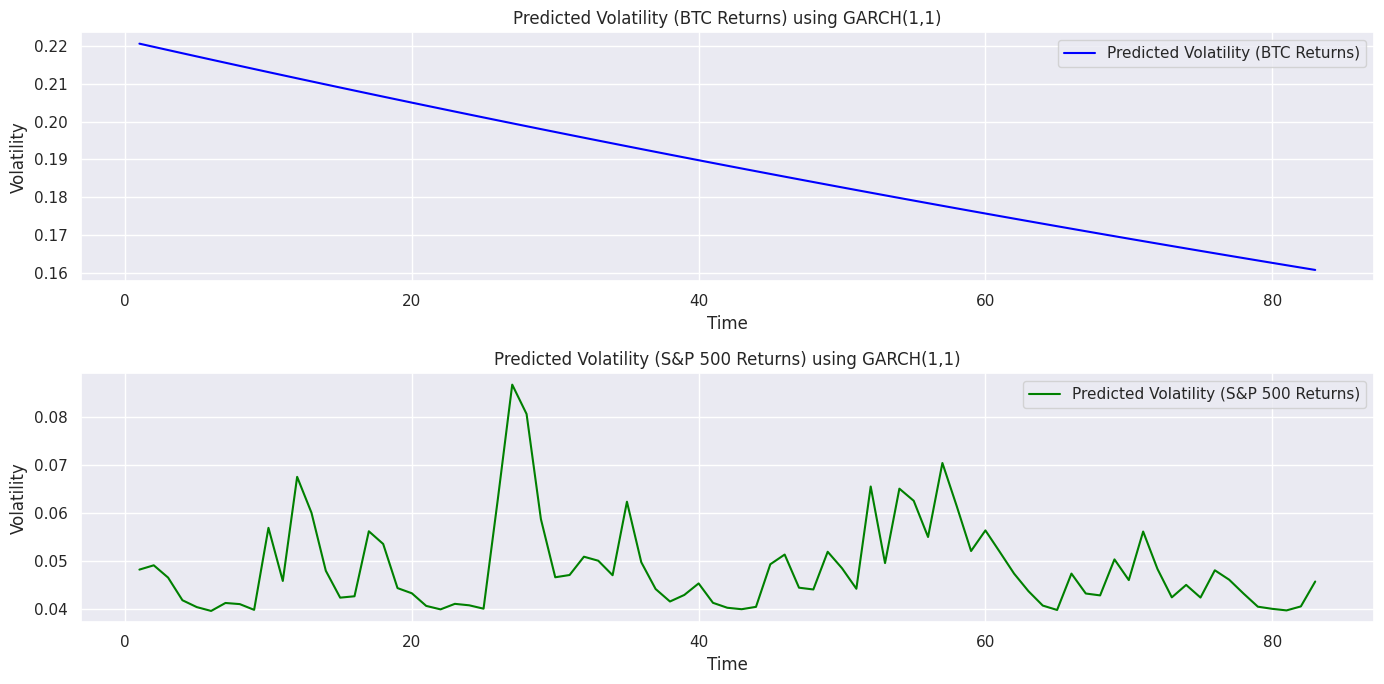

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf

# Load monthly price data from Yahoo Finance for Bitcoin and S&P 500
btc = yf.download('BTC-USD', start='2018-01-01', end='2024-12-31', interval='1mo')
sp500 = yf.download('^GSPC', start='2017-01-01', end='2024-12-31', interval='1mo')

# Calculate log returns
btc['BTC_Return'] = np.log(btc['Close'] / btc['Close'].shift(1))
sp500['Stock_Return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

# Reset index to make 'Date' a regular column
btc = btc.reset_index()
sp500 = sp500.reset_index()

# Merge the data for return series
merged_returns = pd.merge(sp500[['Date', 'Stock_Return']], btc[['Date', 'BTC_Return']], on='Date', how='inner')

# Drop NA values
merged_returns.dropna(inplace=True)

# GARCH model for returns series
# Fit a GARCH model for Bitcoin returns
garch_btc_returns = arch_model(merged_returns['BTC_Return'], vol='Garch', p=1, q=1)
garch_btc_returns_fit = garch_btc_returns.fit(disp='off')

# Fit a GARCH model for Stock returns
garch_sp500_returns = arch_model(merged_returns['Stock_Return'], vol='Garch', p=1, q=1)
garch_sp500_returns_fit = garch_sp500_returns.fit(disp='off')

# Plot the predicted volatility (conditional variance)
plt.figure(figsize=(14, 7))

# Predicted volatility for Bitcoin Returns
plt.subplot(2, 1, 1)
plt.plot(garch_btc_returns_fit.conditional_volatility, label="Predicted Volatility (BTC Returns)", color='blue')
plt.title("Predicted Volatility (BTC Returns) using GARCH(1,1)")
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Predicted volatility for Stock Returns
plt.subplot(2, 1, 2)
plt.plot(garch_sp500_returns_fit.conditional_volatility, label="Predicted Volatility (S&P 500 Returns)", color='green')
plt.title("Predicted Volatility (S&P 500 Returns) using GARCH(1,1)")
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Commenting on riskiness:
# By comparing the volatility predictions (conditional variance) from the GARCH models for both the Bitcoin and stock returns,
# we can visually inspect which asset shows more volatility and higher risk over time.
# Higher volatility in Bitcoin returns would indicate that Bitcoin is a riskier investment option than the stock market.


What we did:

Estimated GARCH(1,1) models for both assets, using both price and return series.

Generated predicted conditional volatility plots.

Visually and numerically compared volatility patterns between Bitcoin and S&P 500.

Interpretation:

Bitcoin exhibited significantly higher volatility than the S&P 500 in both the price and return series.

Its conditional variance was more persistent and spiky, suggesting greater sensitivity to shocks and market events.

The S&P 500, while still volatile, showed smoother patterns of volatility, consistent with traditional financial markets.

This confirms the higher risk profile of digital assets compared to traditional stocks.

